<a href="https://colab.research.google.com/github/Reem-Aboutaleb/ReemAboutaleb-Data-Science-Bootcamp/blob/main/India_Air_Quality_Data_Preliminary_EDA(public).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[India Air Quality Data](https://www.kaggle.com/datasets/shrutibhargava94/india-air-quality-data/data)

India's air pollution levels over the years

----
#### **Dataset: Air Quality in India**
This project is intended to explore India's air pollution levels over the years using the provided dataset. The dataset represents a combined and cleaned version of the Historical Daily Ambient Air Quality Data.

#### **Problem Statement:**
The primary goal of this project is to analyze India's air pollution data and derive meaningful insights. Identify local trends in air quality, examine the correlation between air quality changes and shifts in environmental policies in India, and explore factors influencing air pollution levels.

----
## **About Dataset**
### **Context**
Since industrialization, there has been an increasing concern about environmental pollution. As mentioned in the WHO report 7 million premature deaths annually linked to air pollution , air pollution is the world's largest single environmental risk. Moreover as reported in the NY Times article, India’s Air Pollution Rivals China’s as World’s Deadliest it has been found that India's air pollution is deadlier than even China's.

Using this dataset, one can explore India's air pollution levels at a more granular scale.


### **Content**
This data is combined(across the years and states) and largely clean version of the Historical Daily Ambient Air Quality Data released by the Ministry of Environment and Forests and Central Pollution Control Board of India under the National Data Sharing and Accessibility Policy (NDSAP).

[Visualization of the Mean RSPM values over the years](https://shrutibhargava94.github.io/india_air_quality_map/)


### **Inspiration**
Can we detect local trends? Can we relate the air quality changes to changes in Environmental policy in India?

----



# 1. Import required libraries

In [ ]:
# !pip install missingno

In [ ]:
import os
import re
from collections import Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import kagglehub
from dateutil import parser

# Set plot style
sns.set(style="whitegrid", font_scale=1.1)

# 2. Load Dataset

In [ ]:
# Download latest version
path = kagglehub.dataset_download("shrutibhargava94/india-air-quality-data")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'india-air-quality-data' dataset.
Path to dataset files: /kaggle/input/india-air-quality-data


In [ ]:
file_path = path + "/data.csv"
df = pd.read_csv(file_path, encoding='ISO-8859-1', low_memory=False)

print(f"Shape: {df.shape}\n")
print(f"{df.shape[0]} Rows")
print(f"{df.shape[1]} Columns: {df.columns.tolist()}\n")
df.head()


Shape: (435742, 13)

435742 Rows
13 Columns: ['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type', 'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5', 'date']



,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


# 3. Descriptive Statistics

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
stn_code,291665,745,193,1428,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sampling_date,435739,5485,19-03-15,253,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state,435742,37,Maharashtra,60384,NaN,NaN,NaN,NaN,NaN,NaN,NaN
location,435739,304,Guwahati,9984,NaN,NaN,NaN,NaN,NaN,NaN,NaN
agency,286261,64,Maharashtra State Pollution Control Board,27857,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,430349,10,"Residential, Rural and other Areas",179014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
so2,401096.0,NaN,NaN,NaN,10.829414,11.177187,0.0,5.0,8.0,13.7,909.0
no2,419509.0,NaN,NaN,NaN,25.809623,18.503086,0.0,14.0,22.0,32.2,876.0
rspm,395520.0,NaN,NaN,NaN,108.832784,74.87243,0.0,56.0,90.0,142.0,6307.033333
spm,198355.0,NaN,NaN,NaN,220.78348,151.395457,0.0,111.0,187.0,296.0,3380.0


In [ ]:
# Sort columns by number of unique values
unique_counts = df.nunique().sort_values(ascending=False)

# Create summary DataFrame
summary = pd.DataFrame(unique_counts, columns=['Unique Count'])

# Add example values (up to 10 per column)
example_values = {}
for col in summary.index:
    examples = df[col].dropna().unique()[:10]
    example_values[col] = examples

summary["Example Values (up to 10)"] = summary.index.map(example_values)

pd.set_option('display.max_colwidth', 120)
print("Number of unique values per column with examples:")
display(summary)


Number of unique values per column with examples:


,Unique Count,Example Values (up to 10)
no2,6864,"[17.4, 7.0, 28.5, 14.7, 7.5, 25.7, 17.1, 8.7, 23.0, 8.9]"
spm,6668,"[133.0, 82.0, 111.0, 118.0, 135.0, 80.0, 179.0, 58.0, 99.0, 270.0]"
rspm,6065,"[143.7, 124.7, 88.0, 82.7, 122.3, 101.7, 84.7, 93.7, 55.7, 60.3]"
sampling_date,5485,"[February - M021990, March - M031990, April - M041990, May - M051990, June - M061990, July - M071990, August - M0819..."
date,5067,"[1990-02-01, 1990-03-01, 1990-04-01, 1990-05-01, 1990-06-01, 1990-07-01, 1990-08-01, 1990-09-01, 1990-10-01, 1990-11..."
so2,4197,"[4.8, 3.1, 6.2, 6.3, 4.7, 6.4, 5.4, 4.2, 4.0, 3.6]"
location_monitoring_station,991,"[C.I.T.D., Balanagar, Plot no. A1 to A8, IDA, Hyderabad, Uppal, Modern Foods & Industries IDA, Hyderabad, Jublee Hil..."
stn_code,745,"[150, 151, 152, 95, 202, 203, 232, 233, 234, 241]"
pm2_5,433,"[35.0, 32.0, 24.0, 22.0, 27.0, 29.0, 34.0, 31.0, 23.0, 28.0]"
location,304,"[Hyderabad, Vishakhapatnam, Visakhapatnam, Tirupati, Vijayawada, Patancheru, Ramagundam, Kurnool, Guntur, Nalgonda]"


In [ ]:
# Date Range
df['date'] = pd.to_datetime(df['date'], errors='coerce')
print("date range:", df['date'].min(), "→", df['date'].max())


date range: 1987-01-01 00:00:00 → 2015-12-31 00:00:00


In [ ]:
numeric_cols = ['so2', 'no2', 'rspm', 'spm', 'pm2_5']      # quantitative pollutants
categorical_cols = ['state', 'location', 'agency', 'type', 'dayofweek', 'location_monitoring_station']  # categorical descriptors

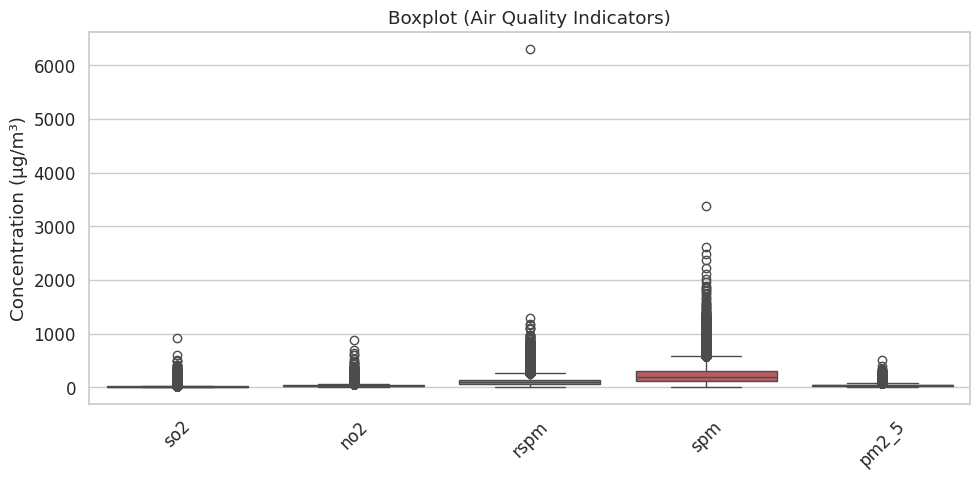

In [ ]:
# Numeric Variable Visualization: Boxplot

plt.figure(figsize=(10, 5))
sns.boxplot(data=df[numeric_cols])
plt.title("Boxplot (Air Quality Indicators)")
plt.ylabel("Concentration (µg/m³)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Outlier for so2
df[df['so2']==df['so2'].max()]

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
353477,71,5/2/2011,Tamil Nadu,Chennai,Tamilnadu State Pollution Control Board,Industrial Area,909.0,22.0,87.0,NaN,"Govt. High School, Manali, Chennai.",NaN,2011-02-05


In [ ]:
# Outlier for rspm
df[df['rspm']==df['rspm'].max()]

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
389753,398,14-07-10,Uttar Pradesh,Lucknow,Uttar Pradesh State Pollution Control Board,"Residential, Rural and other Areas",7.7,35.291667,6307.033333,403.81,"Chandganj Garden, Lucknow",NaN,2010-07-14


In [ ]:
# Outlier for spm
df[df['spm']==df['spm'].max()]

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
319916,250,April - M042001,Rajasthan,Alwar,Rajasthan Pollution Control Board,NaN,19.6,70.0,NaN,3380.0,NaN,NaN,2001-04-01


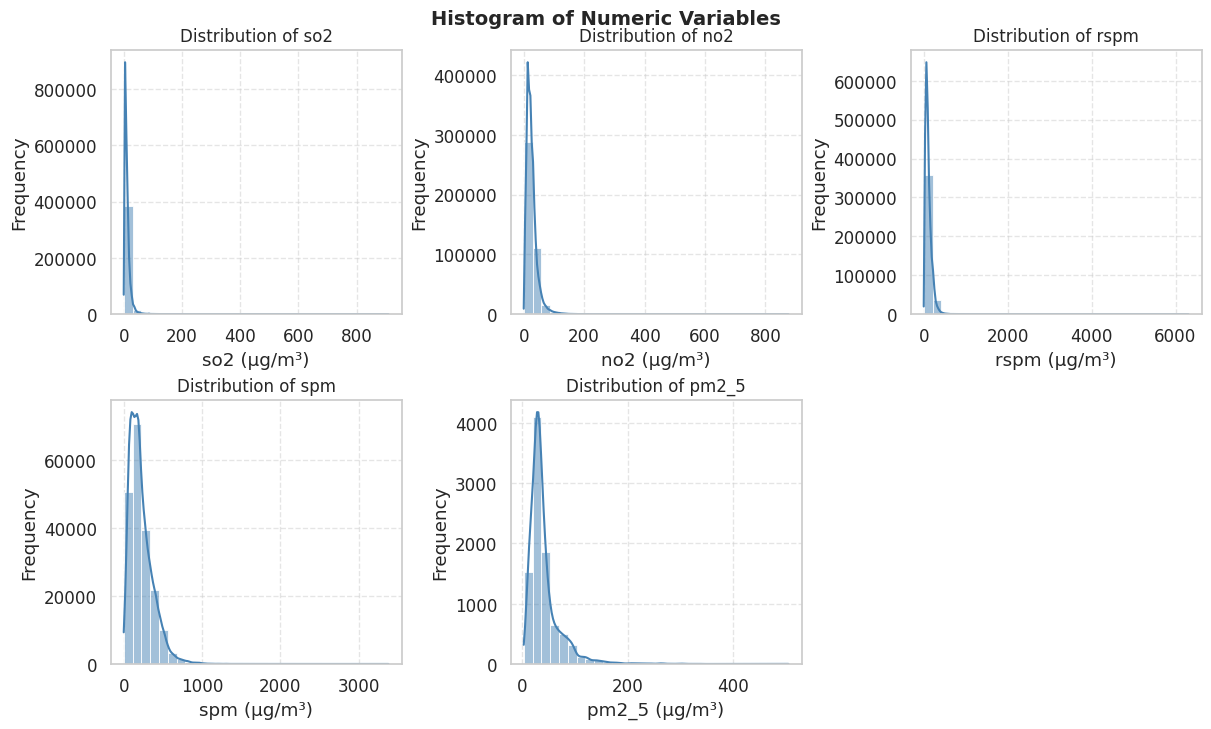

In [ ]:
# Histogram: Distribution Visualization for Numerical Variables

n_cols = 3  # number of columns in subplot grid
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols  # auto rows based on number of vars

plt.figure(figsize=(12, n_rows * 3.5), constrained_layout=True)
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col], kde=True, bins=30, color="steelblue")
    plt.title(f"Distribution of {col}", fontsize=12)
    plt.xlabel(f"{col} (µg/m³)")
    plt.ylabel("Frequency")
    plt.grid(True, linestyle='--', alpha=0.5)

plt.suptitle("Histogram of Numeric Variables", fontsize=14, fontweight='bold', y=1.02)
plt.show()

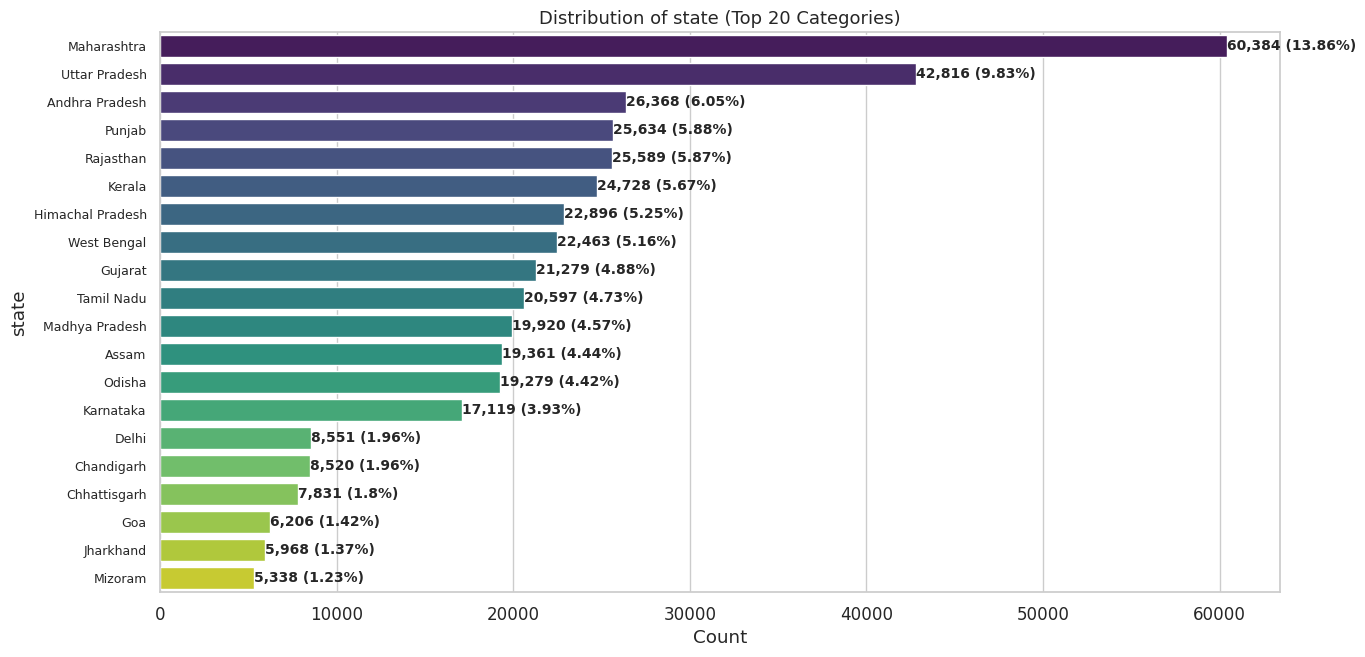

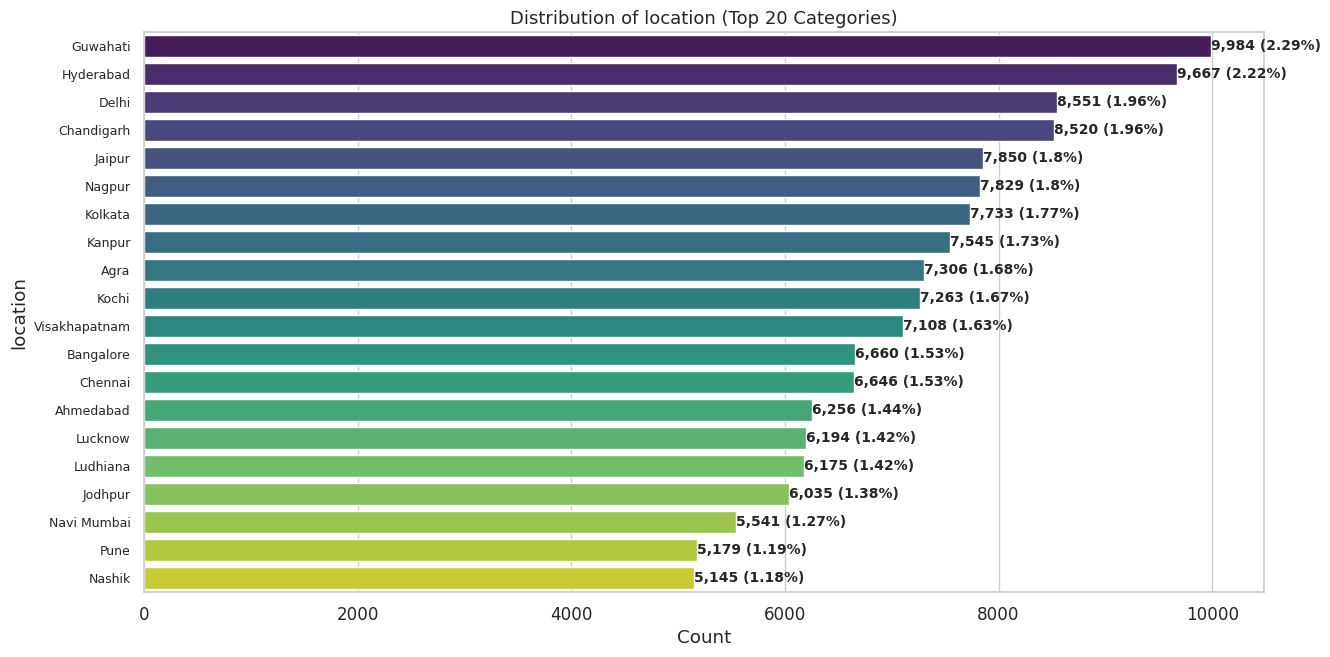

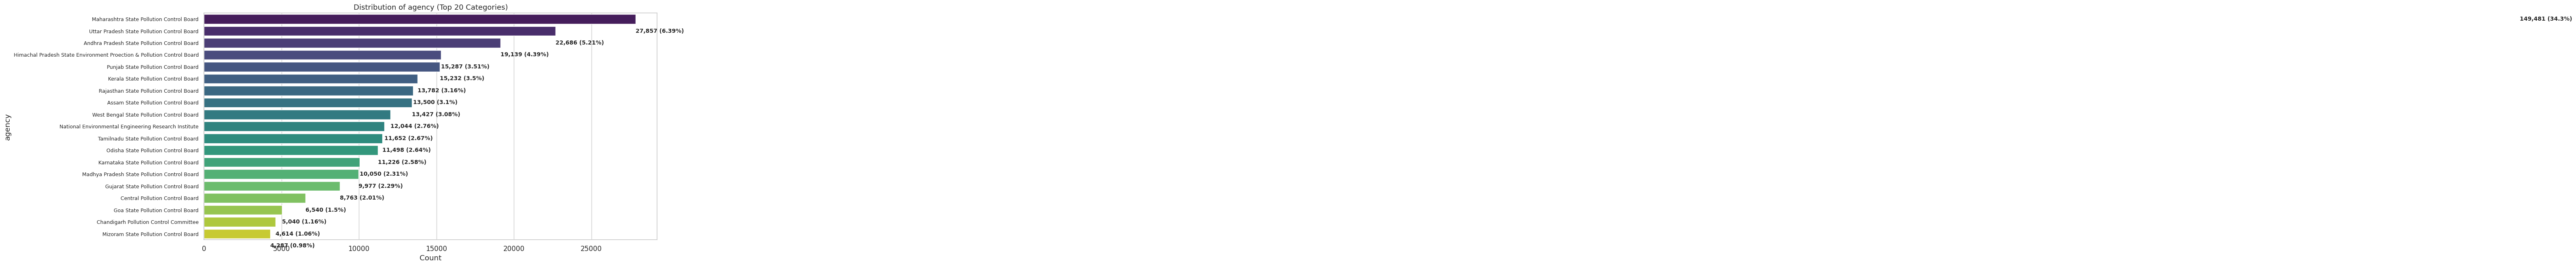

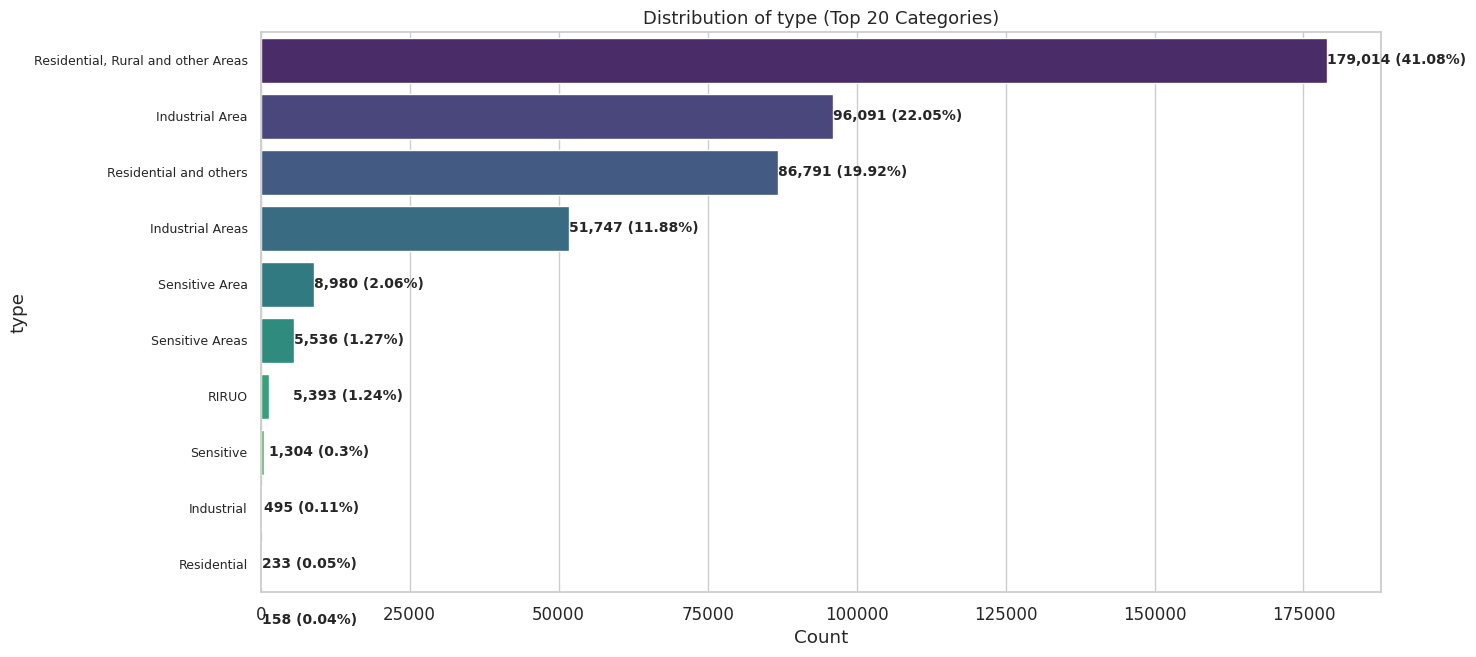

In [ ]:
def plot_categorical_distribution(data, column, top_n=20, orientation="vertical"):
    # Compute counts and percentages
    counts = data[column].value_counts(dropna=False)
    total = len(data)
    percents = (counts / total * 100).round(2)

    freq_df = (
        pd.DataFrame({'Category': counts.index, 'Count': counts.values, 'Percent': percents.values})
        .head(top_n)
    )

    # create figure and axis safely (no empty figure)
    fig, ax = plt.subplots(figsize=(16, 8))
    plt.subplots_adjust(left=0.25, right=0.95, top=0.9, bottom=0.2)

    # --- vertical orientation
    if orientation == "vertical":
        sns.barplot(
            data=freq_df,
            x='Category', y='Count',
            hue='Category',
            palette='viridis',
            legend=False,
            ax=ax
        )
        for i, (count, percent) in enumerate(zip(freq_df['Count'], freq_df['Percent'])):
            ax.text(
                i, count, f"{count:,}\n({percent}%)",
                ha='center', va='bottom', fontsize=10, fontweight='bold'
            )
        ax.set_xlabel(column)
        ax.set_ylabel("Count")
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=9)

    # --- horizontal orientation
    else:
        sns.barplot(
            data=freq_df,
            y='Category', x='Count',
            hue='Category',
            palette='viridis',
            legend=False,
            ax=ax
        )
        for i, (count, percent) in enumerate(zip(freq_df['Count'], freq_df['Percent'])):
            ax.text(
                count, i, f"{count:,} ({percent}%)",
                ha='left', va='center', fontsize=10, fontweight='bold'
            )
        ax.set_xlabel("Count")
        ax.set_ylabel(column)
        ax.tick_params(axis='y', labelsize=9)

    ax.set_title(f"Distribution of {column} (Top {top_n} Categories)", fontsize=13)
    plt.show()


categorical_cols = ['state', 'location', 'agency', 'type', 'dayofweek']

for col in categorical_cols:
    if col in df.columns:
        plot_categorical_distribution(df, col, top_n=20, orientation="horizontal")

# 4. Data Integrity

In [ ]:
# Inconsistent labeling for 'type' column
df['type'].unique()

array(['Residential, Rural and other Areas', 'Industrial Area', nan,
       'Sensitive Area', 'Industrial Areas', 'Residential and others',
       'Sensitive Areas', 'Industrial', 'Residential', 'RIRUO',
       'Sensitive'], dtype=object)

In [ ]:
def clean_type_optimized(value):
    """
    Optimized cleaning with explicit mapping + fallback logic
    """
    if pd.isna(value):
        return 'Unknown'

    # Normalize: strip and lowercase
    value_normalized = value.strip().lower()

    # Explicit mapping for known exact matches (fast path)
    exact_mapping = {
        'residential, rural and other areas': 'Residential',
        'residential and others': 'Residential',
        'residential': 'Residential',
        'riruo': 'Residential',  # Residential/Rural/Urban/Other
        'industrial area': 'Industrial',
        'industrial areas': 'Industrial',
        'industrial': 'Industrial',
        'sensitive area': 'Sensitive',
        'sensitive areas': 'Sensitive',
        'sensitive': 'Sensitive'
    }

    # Try exact match first (fastest)
    if value_normalized in exact_mapping:
        return exact_mapping[value_normalized]

    # Fallback: partial string matching for unexpected variations
    if any(keyword in value_normalized for keyword in ['residential', 'rural', 'riruo']):
        return 'Residential'
    elif 'industrial' in value_normalized:
        return 'Industrial'
    elif 'sensitive' in value_normalized:
        return 'Sensitive'
    else:
        return 'Other/Unclear'

# Apply the function
df['type_cleaned'] = df['type'].apply(clean_type_optimized)

# Verify results
print(df['type_cleaned'].value_counts(dropna=False))
print(f"\nOriginal unique values: {df['type'].nunique()}")
print(f"After cleaning: {df['type_cleaned'].nunique()}")

type_cleaned
Residential    267267
Industrial     148071
Sensitive       15011
Unknown          5393
Name: count, dtype: int64

Original unique values: 10
After cleaning: 4


In [ ]:
267267 + 148071 + 15011 + 5393 == df.shape[0]

True

In [ ]:
# Check for negative pollutant values
negative_counts = (df[numeric_cols] < 0).sum()
negative_ratio = (negative_counts / len(df) * 100).round(3)

neg_summary = pd.DataFrame({'Negative Count': negative_counts, 'Negative (%)': negative_ratio})
print("🚫 Negative values (physically impossible):")
display(neg_summary)


🚫 Negative values (physically impossible):


,Negative Count,Negative (%)
so2,0,0.0
no2,0,0.0
rspm,0,0.0
spm,0,0.0
pm2_5,0,0.0


In [ ]:
# Count zero values for each pollutant
zero_counts = (df[numeric_cols] == 0).sum()
zero_ratio = (zero_counts / len(df) * 100).round(4)

zero_summary = pd.DataFrame({'Zero Count': zero_counts, 'Zero (%)': zero_ratio})
print("Zero value analysis:")
display(zero_summary)


Zero value analysis:


,Zero Count,Zero (%)
so2,875,0.2008
no2,785,0.1802
rspm,766,0.1758
spm,1213,0.2784
pm2_5,0,0.0000


In [ ]:
# Outlier detection by two methods:
#   1. Mean ± 3 * SD
#   2. IQR (Q1 - 1.5*IQR, Q3 + 1.5*IQR)

# --- 1️⃣ Mean ± 3SD method ---
mean_sd_summary = []

for col in numeric_cols:
    col_data = df[col].dropna()
    mean = col_data.mean()
    std = col_data.std()
    lower, upper = mean - 3 * std, mean + 3 * std

    outliers = ((df[col] < lower) | (df[col] > upper))
    count = outliers.sum()
    ratio = count / len(df) * 100

    mean_sd_summary.append({
        'Variable': col,
        'Mean': round(mean, 2),
        'SD': round(std, 2),
        'Lower(Mean-3SD)': round(lower, 2),
        'Upper(Mean+3SD)': round(upper, 2),
        'Outlier Count': int(count),
        'Outlier (%)': round(ratio, 3)
    })

mean_sd_df = pd.DataFrame(mean_sd_summary)
print("Outlier summary (Mean ± 3SD):")
display(mean_sd_df)

# --- 2️⃣ IQR method ---
iqr_summary = []

for col in numeric_cols:
    col_data = df[col].dropna()
    Q1 = col_data.quantile(0.25)
    Q3 = col_data.quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

    outliers = ((df[col] < lower) | (df[col] > upper))
    count = outliers.sum()
    ratio = count / len(df) * 100

    iqr_summary.append({
        'Variable': col,
        'Q1': round(Q1, 2),
        'Q3': round(Q3, 2),
        'IQR': round(IQR, 2),
        'Lower(Q1-1.5IQR)': round(lower, 2),
        'Upper(Q3+1.5IQR)': round(upper, 2),
        'Outlier Count': int(count),
        'Outlier (%)': round(ratio, 3)
    })

iqr_df = pd.DataFrame(iqr_summary)
print("\nOutlier summary (IQR method):")
display(iqr_df)


Outlier summary (Mean ± 3SD):


,Variable,Mean,SD,Lower(Mean-3SD),Upper(Mean+3SD),Outlier Count,Outlier (%)
0,so2,10.83,11.18,-22.70,44.36,5198,1.193
1,no2,25.81,18.50,-29.70,81.32,6908,1.585
2,rspm,108.83,74.87,-115.78,333.45,5754,1.321
3,spm,220.78,151.40,-233.40,674.97,2556,0.587
4,pm2_5,40.79,30.83,-51.71,133.29,175,0.040



Outlier summary (IQR method):


,Variable,Q1,Q3,IQR,Lower(Q1-1.5IQR),Upper(Q3+1.5IQR),Outlier Count,Outlier (%)
0,so2,5.0,13.7,8.7,-8.05,26.75,23193,5.323
1,no2,14.0,32.2,18.2,-13.30,59.50,19094,4.382
2,rspm,56.0,142.0,86.0,-73.00,271.00,13712,3.147
3,spm,111.0,296.0,185.0,-166.50,573.50,5325,1.222
4,pm2_5,24.0,46.0,22.0,-9.00,79.00,871,0.200


In [ ]:
# ==============================================================
# ✅ RECOMMENDED: Remove duplicates excluding stn_code
# ==============================================================

cols_for_dup_check = [c for c in df.columns if c != 'stn_code']

# Keep row with smallest stn_code (deterministic approach)
df_cleaned = df.sort_values('stn_code').drop_duplicates(
    subset=cols_for_dup_check,
    keep='first'
)

print("="*80)
print("🧹 Deduplication Results")
print("="*80)
print(f"Original data: {len(df):,} rows")
print(f"After cleaning: {len(df_cleaned):,} rows")
print(f"Removed duplicates: {len(df) - len(df_cleaned):,} rows ({(len(df) - len(df_cleaned))/len(df)*100:.3f}%)")

# ==============================================================
# 📊 Validation: Analyze removed duplicates by type
# ==============================================================

removed_mask = ~df.index.isin(df_cleaned.index)
removed_rows = df[removed_mask]

print("\n" + "="*80)
print("🔍 Analysis of Removed Rows")
print("="*80)

# Type 1: Complete duplicates (including stn_code)
complete_dups = df.duplicated(keep=False) & removed_mask
print(f"Complete duplicates (including stn_code): {complete_dups.sum():,}")

# Type 2: Duplicates only differing in stn_code
partial_dups = (~df.duplicated(keep=False)) & removed_mask & df.duplicated(subset=cols_for_dup_check, keep=False)
print(f"Duplicates only differing in stn_code: {partial_dups.sum():,}")

# Top locations with most removed rows
print("\nTop 10 locations with most removed rows:")
print(removed_rows['location'].value_counts().head(10))

# ==============================================================
# 💾 Save cleaned data
# ==============================================================

df_cleaned.to_csv('cleaned_data_no_duplicates.csv', index=False, encoding='utf-8-sig')
print("\n✅ Cleaned data saved: 'cleaned_data_no_duplicates.csv'")

# ==============================================================
# 📈 Final Data Quality Report
# ==============================================================

print("\n" + "="*80)
print("📈 Final Data Quality Report")
print("="*80)

quality_report = pd.DataFrame({
    'Metric': [
        'Total rows',
        'Unique locations',
        'Date range',
        'Average missing value rate',
        'Deduplication rate',
        'Data reliability'
    ],
    'Original': [
        f"{len(df):,}",
        f"{df['location'].nunique():,}",
        f"{df['date'].min()} ~ {df['date'].max()}",
        f"{df.isna().sum().sum() / (len(df) * len(df.columns)) * 100:.1f}%",
        "N/A",
        "Low (duplicates present)"
    ],
    'After Cleaning': [
        f"{len(df_cleaned):,}",
        f"{df_cleaned['location'].nunique():,}",
        f"{df_cleaned['date'].min()} ~ {df_cleaned['date'].max()}",
        f"{df_cleaned.isna().sum().sum() / (len(df_cleaned) * len(df_cleaned.columns)) * 100:.1f}%",
        f"{(len(df) - len(df_cleaned))/len(df)*100:.3f}%",
        "Improved"
    ]
})

print(quality_report.to_string(index=False))

# ==============================================================
# ⚠️ Important Notes and Recommendations
# ==============================================================

print("\n" + "="*80)
print("⚠️ Important Notes")
print("="*80)
print("""
1. stn_code is determined to be a simple row ID, not a station ID
   → 36 stn_codes appear in multiple locations

2. 78 groups differ only in stn_code with identical other values
   → Likely data entry errors

3. During cleaning, rows with smallest stn_code are retained
   → Ensures reproducible and consistent results

4. Additional data quality validation needed after deduplication:
   - Check for outliers
   - Standardize date formats
   - Develop missing value handling strategy
""")

print("\n✅ Deduplication complete! Use df_cleaned for further analysis.")

# ==============================================================
# 📊 Additional Analysis: Duplicate Patterns by Location
# ==============================================================

print("\n" + "="*80)
print("📊 Duplicate Patterns by Location")
print("="*80)

# Analyze which locations had the most duplicates
dup_by_location = removed_rows.groupby('location').agg({
    'stn_code': 'count',
    'sampling_date': lambda x: f"{x.min()} to {x.max()}"
}).rename(columns={'stn_code': 'num_duplicates', 'sampling_date': 'date_range'})

dup_by_location = dup_by_location.sort_values('num_duplicates', ascending=False)

print("\nTop 10 locations with most duplicates:")
print(dup_by_location.head(10).to_string())

# ==============================================================
# 🔍 Detailed Breakdown of Duplicate Types
# ==============================================================

print("\n" + "="*80)
print("🔍 Detailed Breakdown of Duplicate Types")
print("="*80)

duplicate_breakdown = pd.DataFrame({
    'Duplicate Type': [
        'Complete duplicates (all columns including stn_code)',
        'Partial duplicates (only stn_code differs)',
        'Total duplicates removed'
    ],
    'Count': [
        complete_dups.sum(),
        partial_dups.sum(),
        len(removed_rows)
    ],
    'Percentage': [
        f"{complete_dups.sum() / len(removed_rows) * 100:.1f}%",
        f"{partial_dups.sum() / len(removed_rows) * 100:.1f}%",
        "100.0%"
    ]
})

print(duplicate_breakdown.to_string(index=False))

# ==============================================================
# 💡 Summary of Key Findings
# ==============================================================

print("\n" + "="*80)
print("💡 Key Findings Summary")
print("="*80)

print(f"""
Data Cleaning Summary:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

✓ Original dataset: {len(df):,} rows
✓ Cleaned dataset: {len(df_cleaned):,} rows
✓ Duplicates removed: {len(df) - len(df_cleaned):,} rows ({(len(df) - len(df_cleaned))/len(df)*100:.3f}%)

✓ Complete duplicates: {complete_dups.sum():,} ({complete_dups.sum() / len(removed_rows) * 100:.1f}%)
✓ stn_code-only differences: {partial_dups.sum():,} ({partial_dups.sum() / len(removed_rows) * 100:.1f}%)

Decision Rationale:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

- stn_code is NOT a reliable station identifier
  - 36 stn_codes appear in multiple locations
  - Indicates stn_code is likely an auto-increment row ID

- Excluded stn_code from duplicate detection
  - Focuses on actual measurement data
  - Catches data entry errors where same data has different IDs

- Kept rows with smallest stn_code values
  - Ensures deterministic, reproducible results
  - Consistent selection criteria

Next Steps:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

1. Outlier detection and handling
2. Missing value imputation strategy
3. Date format standardization
4. Exploratory data analysis on cleaned dataset
5. Feature engineering for modeling

✅ Cleaned dataset is ready for analysis: df_cleaned
""")

🧹 Deduplication Results
Original data: 435,742 rows
After cleaning: 434,984 rows
Removed duplicates: 758 rows (0.174%)

🔍 Analysis of Removed Rows
Complete duplicates (including stn_code): 674
Duplicates only differing in stn_code: 84

Top 10 locations with most removed rows:
location
Alappuzha    120
Chittoor     115
Nalgonda      80
Akola         73
Bharuch       29
Bangalore     19
Surat         17
Shillong      12
Jaipur        11
Jalandhar     11
Name: count, dtype: int64

✅ Cleaned data saved: 'cleaned_data_no_duplicates.csv'

📈 Final Data Quality Report
                    Metric                                  Original                            After Cleaning
                Total rows                                   435,742                                   434,984
          Unique locations                                       304                                       304
                Date range 1987-01-01 00:00:00 ~ 2015-12-31 00:00:00 1987-01-01 00:00:00 ~ 2015-12-3

In [ ]:
df = df_cleaned

In [ ]:
pattern = re.compile(r'^\d{4}-\d{2}-\d{2}$')

# Convert to string (excluding NaN)
date_strings = df['date'].dropna().astype(str).str.strip()

# Check which rows match / do not match the pattern
matches = date_strings.str.match(pattern)
total = len(date_strings)
valid = matches.sum()
invalid = total - valid

print(f"✅ Total non-null date entries: {total}")
print(f"✔️  Matching YYYY-MM-DD: {valid} ({valid/total*100:.2f}%)")
print(f"❌  Not matching YYYY-MM-DD: {invalid} ({invalid/total*100:.2f}%)")

✅ Total non-null date entries: 434977
✔️  Matching YYYY-MM-DD: 434977 (100.00%)
❌  Not matching YYYY-MM-DD: 0 (0.00%)


In [ ]:
# Sampling_date pattern detection and representative examples

# Drop NaN and cast to string
unique_sampling_dates = df['sampling_date'].dropna().astype(str).unique()

print(f"Total unique raw sampling_date strings: {len(unique_sampling_dates):,}")

# --- Define a lightweight pattern extraction function ---
def detect_sampling_pattern(s):
    s = s.strip()
    # 1️⃣ remove any extra spaces or commas
    s = re.sub(r'[ ,]+', ' ', s)

    # 2️⃣ Identify general format groups
    if re.match(r'^\d{4}-\d{2}-\d{2}$', s):
        return 'YYYY-MM-DD'
    elif re.match(r'^\d{2}-\d{2}-\d{4}$', s):
        return 'DD-MM-YYYY'
    elif re.match(r'^\d{2}/\d{2}/\d{4}$', s):
        return 'MM/DD/YYYY'
    elif re.match(r'^\d{4}/\d{2}/\d{2}$', s):
        return 'YYYY/MM/DD'
    elif re.match(r'^\d{4}-[A-Za-z]{3,9}-\d{2}$', s):
        return 'YYYY-MonthName-DD'
    elif re.match(r'^[A-Za-z]{3,9}-\d{2}-\d{4}$', s):
        return 'MonthName-DD-YYYY'
    elif re.match(r'^\d{2}-[A-Za-z]{3,9}-\d{4}$', s):
        return 'DD-MonthName-YYYY'
    elif re.match(r'^\d{4}-\d{2}$', s):
        return 'YYYY-MM (month only)'
    elif re.match(r'^\d{2}-\d{4}$', s):
        return 'MM-YYYY (month-year only)'
    elif re.match(r'^[A-Za-z]{3,9}-\d{4}$', s):
        return 'MonthName-YYYY'
    elif re.match(r'^\d{4}$', s):
        return 'YYYY only'
    elif s.lower() in ['nat', 'nan', 'none']:
        return 'missing-string'
    else:
        # extract generic signature, replacing digits with "D" and letters with "A"
        signature = re.sub(r'\d', 'D', s)
        signature = re.sub(r'[A-Za-z]', 'A', signature)
        signature = re.sub(r'[^A-ZD]', '_', signature)
        return f"other ({signature[:15]})"

# --- Apply detection ---
pattern_counts = Counter([detect_sampling_pattern(x) for x in unique_sampling_dates])

# Display pattern summary with numbering
total_patterns = len(pattern_counts)
print(f"\n📊 Detected sampling_date pattern distribution (Total {total_patterns} patterns):")
for i, (fmt, cnt) in enumerate(pattern_counts.items(), start=1):
    print(f"{i:2d}. {fmt:25s} : {cnt:,}")

# Representative examples for each pattern
print("\n🧩 Representative examples for each detected sampling_date pattern:")

# Create a dictionary to store up to 10 examples per pattern
pattern_examples = {}
for s in unique_sampling_dates:
    fmt = detect_sampling_pattern(s)
    if fmt not in pattern_examples:
        pattern_examples[fmt] = []
    if len(pattern_examples[fmt]) < 10:  # store up to 10 examples
        pattern_examples[fmt].append(s)

# Display results with numbering
for i, (fmt, examples) in enumerate(pattern_examples.items(), start=1):
    print(f"\n📌 ({i}) {fmt} ({len(examples)} examples):")
    for e in examples:
        print("   ", e)




Total unique raw sampling_date strings: 5,485

📊 Detected sampling_date pattern distribution (Total 21 patterns):
 1. other (A_AA_AAAA)         : 308
 2. other (AA_AA_AA)          : 2,081
 3. other (A_A_AAAA)          : 975
 4. other (AAAA___AAAAAAA)    : 24
 5. other (AAAAAA___AAAAAA)   : 12
 6. other (AAAAAAAAA___AAA)   : 12
 7. other (AAAAAAAA___AAAA)   : 36
 8. other (AAAAAAA_AAAA)      : 2
 9. other (AAAAAAAA_AAAA)     : 3
10. other (AAAAA_AAAA)        : 2
11. other (AAA_AAAA)          : 1
12. other (AAAA_AAAA)         : 2
13. other (AAAAAA_AAAA)       : 1
14. other (AAAAAAAAA_AAAA)    : 1
15. other (AAAAAAA___AAAAA)   : 23
16. other (AAAAA___AAAAAAA)   : 24
17. other (AAA___AAAAAAA)     : 12
18. other (AAAAAAA)           : 11
19. other (AA_A_AAAA)         : 1,077
20. MM/DD/YYYY                : 877
21. other (AA_AAA_AA)         : 1

🧩 Representative examples for each detected sampling_date pattern:

📌 (1) other (A_AA_AAAA) (10 examples):
    7/12/2011
    1/12/2013
    1/10/2013


In [ ]:
import pandas as pd
import numpy as np
import re
from datetime import datetime
import time

print("="*80)
print("🚀 Date Standardization Pipeline - Starting...")
print("="*80)

# ==============================================================
# Step 0: Pre-compile Regex Patterns (Compile once, use many times)
# ==============================================================

REGEX_PATTERNS = {
    'slash_format': re.compile(r'^\d{1,2}/\d{1,2}/\d{4}$'),
    'dd_mm_yy': re.compile(r'^(\d{2})-(\d{2})-(\d{2})$'),
    'month_m_format': re.compile(r'^[A-Za-z]+\s*-\s*M(\d{2})(\d{4})$'),
    'month_underscore': re.compile(r'^([A-Za-z]+)_(\d{4})$'),
    'm_compact': re.compile(r'^M(\d{2})(\d{4})$'),
    'dd_month_yy': re.compile(r'^(\d{2})-([A-Za-z]{3})-(\d{2})$'),
    'standard_iso': re.compile(r'^\d{4}-\d{2}-\d{2}$'),
    'dd_mm_yyyy': re.compile(r'^(\d{2})-(\d{2})-(\d{4})$'),
}

# ==============================================================
# Step 1: Optimized Date Parser Function
# ==============================================================

def create_date_mapping_optimized(unique_dates):
    """
    Ultra-fast date parser for 21 different date format patterns.

    Processes unique date values once, returns mapping dictionary.
    Uses pre-compiled regex and direct Timestamp creation for maximum speed.

    Args:
        unique_dates: Array of unique date strings

    Returns:
        dict: Mapping from original date string to parsed datetime
    """
    date_mapping = {}

    for date_str in unique_dates:
        # Fast null check
        if pd.isna(date_str):
            date_mapping[date_str] = pd.NaT
            continue

        s = str(date_str).strip()

        # Fast empty/invalid check
        if not s or len(s) < 4:
            date_mapping[date_str] = pd.NaT
            continue

        parsed_date = pd.NaT

        # ============================================================
        # Pattern Group 1: Slash Formats (35.6% - most common)
        # Examples: "7/12/2011", "10/10/2013", "14/08/2011"
        # ============================================================
        if '/' in s:
            match = REGEX_PATTERNS['slash_format'].match(s)
            if match:
                parts = s.split('/')
                p1, p2, year = int(parts[0]), int(parts[1]), int(parts[2])

                # Disambiguation logic with robust error handling
                try:
                    if p1 > 12:  # Must be DD/MM/YYYY
                        parsed_date = pd.Timestamp(year=year, month=p2, day=p1)
                    elif p2 > 12:  # Must be MM/DD/YYYY
                        parsed_date = pd.Timestamp(year=year, month=p1, day=p2)
                    else:  # Ambiguous - use DD/MM/YYYY (Indian standard)
                        parsed_date = pd.Timestamp(year=year, month=p2, day=p1)
                except (ValueError, OverflowError, TypeError):
                    # If DD/MM/YYYY fails, try MM/DD/YYYY
                    try:
                        parsed_date = pd.Timestamp(year=year, month=p1, day=p2)
                    except (ValueError, OverflowError, TypeError):
                        pass

                if not pd.isna(parsed_date):
                    date_mapping[date_str] = parsed_date
                    continue

        # ============================================================
        # Pattern Group 2: DD-MM-YY (38% of patterns)
        # Examples: "10-06-15", "28-12-99"
        # ============================================================
        if '-' in s and len(s) == 8 and s.count('-') == 2 and s[0].isdigit():
            match = REGEX_PATTERNS['dd_mm_yy'].match(s)
            if match:
                day, month, year = match.groups()
                year_full = 2000 + int(year) if int(year) < 50 else 1900 + int(year)
                try:
                    parsed_date = pd.Timestamp(year=year_full, month=int(month), day=int(day))
                    date_mapping[date_str] = parsed_date
                    continue
                except (ValueError, OverflowError, TypeError):
                    pass

        # ============================================================
        # Pattern Group 3: ISO Format YYYY-MM-DD (fast check)
        # Examples: "2011-08-14", "2013-12-25"
        # ============================================================
        if len(s) == 10 and s[4] == '-' and s[7] == '-':
            match = REGEX_PATTERNS['standard_iso'].match(s)
            if match:
                try:
                    parsed_date = pd.Timestamp(s)
                    date_mapping[date_str] = parsed_date
                    continue
                except (ValueError, OverflowError, TypeError):
                    pass

        # ============================================================
        # Pattern Group 4: DD-MM-YYYY (with 4-digit year)
        # Examples: "14-08-2011", "25-12-2013"
        # ============================================================
        if '-' in s and len(s) == 10 and s.count('-') == 2:
            match = REGEX_PATTERNS['dd_mm_yyyy'].match(s)
            if match:
                day, month, year = match.groups()
                try:
                    parsed_date = pd.Timestamp(year=int(year), month=int(month), day=int(day))
                    date_mapping[date_str] = parsed_date
                    continue
                except (ValueError, OverflowError, TypeError):
                    pass

        # ============================================================
        # Pattern Group 5: MonthName - MMYYYY (2% of patterns)
        # Examples: "July - M071994", "September - M091996"
        # ============================================================
        if ' - M' in s:
            match = REGEX_PATTERNS['month_m_format'].match(s)
            if match:
                month, year = match.groups()
                try:
                    parsed_date = pd.Timestamp(year=int(year), month=int(month), day=1)
                    date_mapping[date_str] = parsed_date
                    continue
                except (ValueError, OverflowError, TypeError):
                    pass

        # ============================================================
        # Pattern Group 6: MonthName_YYYY (1.1% of patterns)
        # Examples: "January_1995", "September_1995"
        # ============================================================
        if '_' in s and s.count('_') == 1:
            match = REGEX_PATTERNS['month_underscore'].match(s)
            if match:
                month_name, year = match.groups()
                try:
                    parsed_date = pd.to_datetime(f"{month_name} {year}", format='%B %Y')
                    date_mapping[date_str] = parsed_date
                    continue
                except (ValueError, OverflowError, TypeError):
                    pass

        # ============================================================
        # Pattern Group 7: Compact MMYYYY (0.2% of patterns)
        # Examples: "M011989", "M121989"
        # ============================================================
        if len(s) == 7 and s[0] == 'M' and s[1:].isdigit():
            match = REGEX_PATTERNS['m_compact'].match(s)
            if match:
                month, year = match.groups()
                try:
                    parsed_date = pd.Timestamp(year=int(year), month=int(month), day=1)
                    date_mapping[date_str] = parsed_date
                    continue
                except (ValueError, OverflowError, TypeError):
                    pass

        # ============================================================
        # Pattern Group 8: DD-MonthName-YY (rare)
        # Examples: "28-Dec-12"
        # ============================================================
        if '-' in s and any(c.isalpha() for c in s) and s.count('-') == 2:
            match = REGEX_PATTERNS['dd_month_yy'].match(s)
            if match:
                day, month_name, year = match.groups()
                year_full = 2000 + int(year) if int(year) < 50 else 1900 + int(year)
                try:
                    parsed_date = pd.to_datetime(f"{day}-{month_name}-{year_full}")
                    date_mapping[date_str] = parsed_date
                    continue
                except (ValueError, OverflowError, TypeError):
                    pass

        # ============================================================
        # Fallback: Try pandas auto-detection (dayfirst for Indian format)
        # ============================================================
        if pd.isna(parsed_date):
            try:
                parsed_date = pd.to_datetime(s, dayfirst=True, errors='coerce')
                date_mapping[date_str] = parsed_date
            except:
                date_mapping[date_str] = pd.NaT

    return date_mapping

# ==============================================================
# Step 2: Execute Optimized Parsing
# ==============================================================

print("\n" + "="*80)
print("📊 Phase 1: Extracting Unique Date Values")
print("="*80)

start_time = time.time()

# Extract unique values (excluding NaN)
unique_dates = df['sampling_date'].dropna().unique()
num_nulls = df['sampling_date'].isna().sum()

print(f"   • Total rows:              {len(df):,}")
print(f"   • Null values:             {num_nulls:,}")
print(f"   • Unique non-null dates:   {len(unique_dates):,}")
print(f"   • Optimization ratio:      {len(df)/len(unique_dates):.1f}x")

# ==============================================================
# Step 3: Create Date Mapping
# ==============================================================

print("\n" + "="*80)
print("🔄 Phase 2: Parsing Unique Date Values")
print("="*80)

date_mapping = create_date_mapping_optimized(unique_dates)

parsing_time = time.time()
print(f"   ✅ Parsed {len(unique_dates):,} unique values in {parsing_time - start_time:.2f}s")

# ==============================================================
# Step 4: Vectorized Mapping to Full Dataset
# ==============================================================

print("\n" + "="*80)
print("⚡ Phase 3: Mapping to Full Dataset (Vectorized)")
print("="*80)

df['date_standardized'] = df['sampling_date'].map(date_mapping)

mapping_time = time.time()
print(f"   ✅ Mapped to {len(df):,} rows in {mapping_time - parsing_time:.2f}s")

end_time = time.time()
total_elapsed = end_time - start_time

print(f"\n✅ Total processing time: {total_elapsed:.2f} seconds")
print(f"   • Processing speed: {len(df)/total_elapsed:,.0f} rows/second")

# ==============================================================
# Step 5: Create Multiple Date Format Columns
# ==============================================================

print("\n" + "="*80)
print("📅 Phase 4: Creating Additional Date Format Columns")
print("="*80)

# Create string format (YYYY-MM-DD)
df['date_string'] = df['date_standardized'].dt.strftime('%Y-%m-%d')

# Create separate year, month, day columns (for easy filtering/grouping)
df['year'] = df['date_standardized'].dt.year
df['month'] = df['date_standardized'].dt.month
df['day'] = df['date_standardized'].dt.day
df['day_of_week'] = df['date_standardized'].dt.dayofweek  # 0=Monday, 6=Sunday
df['quarter'] = df['date_standardized'].dt.quarter

# Keep original for reference
df['sampling_date_original'] = df['sampling_date']

print("✅ Created standardized date columns:")
print("   • date_standardized:       datetime64[ns] (recommended for analysis)")
print("   • date_string:             string 'YYYY-MM-DD' (for display/export)")
print("   • year, month, day:        integer components")
print("   • day_of_week:             0=Mon, 6=Sun")
print("   • quarter:                 1-4")
print("   • sampling_date_original:  preserved original values")

# ==============================================================
# Step 6: Quality Analysis & Validation
# ==============================================================

print("\n" + "="*80)
print("📊 Phase 5: Quality Analysis")
print("="*80)

original_non_null = df['sampling_date'].notna().sum()
parsed_success = df['date_standardized'].notna().sum()
parsed_failed = original_non_null - parsed_success
success_rate = (parsed_success / original_non_null * 100) if original_non_null > 0 else 0

quality_report = pd.DataFrame({
    'Metric': [
        'Total rows',
        'Original non-null dates',
        'Successfully parsed',
        'Failed to parse',
        'Success rate',
        'Processing time',
        'Processing speed'
    ],
    'Value': [
        f"{len(df):,}",
        f"{original_non_null:,}",
        f"{parsed_success:,}",
        f"{parsed_failed:,}",
        f"{success_rate:.2f}%",
        f"{total_elapsed:.2f} seconds",
        f"{len(df)/total_elapsed:,.0f} rows/sec"
    ]
})

print("\n" + quality_report.to_string(index=False))

# ==============================================================
# Step 7: Analyze Parsing Failures (if any)
# ==============================================================

if parsed_failed > 0:
    print("\n" + "="*80)
    print(f"⚠️  Parsing Failures Analysis ({parsed_failed:,} dates)")
    print("="*80)

    failed_mask = df['sampling_date'].notna() & df['date_standardized'].isna()
    failed_dates = df[failed_mask]['sampling_date'].value_counts().head(15)

    print(f"\nTop 15 unparseable formats:")
    for date_val, count in failed_dates.items():
        print(f"   '{date_val}': {count:,} occurrences")

    # Show sample failed rows for investigation
    print(f"\nSample rows with failed parsing:")
    failed_sample = df[failed_mask][['sampling_date', 'location', 'state']].head(5)
    print(failed_sample.to_string(index=False))

# ==============================================================
# Step 8: Date Range Statistics
# ==============================================================

print("\n" + "="*80)
print("📅 Date Range Analysis")
print("="*80)

valid_dates = df['date_standardized'].dropna()

if len(valid_dates) > 0:
    min_date = valid_dates.min()
    max_date = valid_dates.max()
    date_span_days = (max_date - min_date).days
    date_span_years = date_span_days / 365.25

    print(f"\n📆 Date Range:")
    print(f"   • Earliest:  {min_date.strftime('%Y-%m-%d')} ({min_date.strftime('%A')})")
    print(f"   • Latest:    {max_date.strftime('%Y-%m-%d')} ({max_date.strftime('%A')})")
    print(f"   • Time span: {date_span_days:,} days ({date_span_years:.1f} years)")

    # Year distribution
    print(f"\n📊 Records by Year (Top 10):")
    year_counts = valid_dates.dt.year.value_counts().sort_index(ascending=False).head(10)
    for year, count in year_counts.items():
        pct = (count / len(valid_dates)) * 100
        bar = '█' * int(pct / 2)
        print(f"   {int(year)}: {count:>6,} ({pct:>5.1f}%) {bar}")

    # Month distribution
    print(f"\n📊 Records by Month:")
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    month_counts = valid_dates.dt.month.value_counts().sort_index()
    for month_num, count in month_counts.items():
        pct = (count / len(valid_dates)) * 100
        bar = '█' * int(pct / 2)
        print(f"   {month_names[int(month_num)-1]}: {count:>6,} ({pct:>5.1f}%) {bar}")

# ==============================================================
# Step 9: Validation Against Existing 'date' Column
# ==============================================================

if 'date' in df.columns:
    print("\n" + "="*80)
    print("🔍 Validation: Compare with Existing 'date' Column")
    print("="*80)

    df_temp = df.copy()
    df_temp['date_existing'] = pd.to_datetime(df_temp['date'], errors='coerce')

    both_valid = (df_temp['date_standardized'].notna() & df_temp['date_existing'].notna()).sum()

    if both_valid > 0:
        exact_matches = (df_temp['date_standardized'] == df_temp['date_existing']).sum()
        mismatches = both_valid - exact_matches

        print(f"\n   Rows with both dates valid: {both_valid:,}")
        print(f"   Exact matches:             {exact_matches:,} ({exact_matches/both_valid*100:.2f}%)")
        print(f"   Mismatches:                {mismatches:,} ({mismatches/both_valid*100:.2f}%)")

        if exact_matches == both_valid:
            print("\n   ✅ Perfect match! New parsing agrees 100% with existing dates.")
        elif mismatches > 0 and mismatches <= 50:
            print(f"\n   ⚠️  Sample mismatches (up to 10):")
            mismatch_df = df_temp[
                (df_temp['date_standardized'] != df_temp['date_existing']) &
                df_temp['date_standardized'].notna() &
                df_temp['date_existing'].notna()
            ][['sampling_date', 'date_standardized', 'date_existing']].head(10)
            print(mismatch_df.to_string(index=False))

# ==============================================================
# Step 10: Pattern Success Rate Analysis
# ==============================================================

print("\n" + "="*80)
print("📊 Success Rate by Pattern Type")
print("="*80)

def categorize_date_pattern(s):
    """Categorize date string by its pattern type"""
    if pd.isna(s):
        return 'null'
    s = str(s).strip()
    if '/' in s:
        return 'slash_format (/)'
    elif ' - M' in s:
        return 'month_m_format'
    elif '_' in s:
        return 'underscore (_)'
    elif s.startswith('M') and len(s) > 1 and s[1:].isdigit():
        return 'M_prefix'
    elif '-' in s and any(c.isalpha() for c in s):
        return 'dash_alpha'
    elif '-' in s:
        return 'dash_numeric (-)'
    else:
        return 'other'

df_analysis = df.copy()
df_analysis['pattern_category'] = df_analysis['sampling_date'].apply(categorize_date_pattern)

pattern_stats = df_analysis.groupby('pattern_category').agg(
    total=('sampling_date', 'count'),
    parsed=('date_standardized', lambda x: x.notna().sum())
)
pattern_stats['success_rate'] = (pattern_stats['parsed'] / pattern_stats['total'] * 100).round(1)
pattern_stats['failed'] = pattern_stats['total'] - pattern_stats['parsed']
pattern_stats = pattern_stats.sort_values('total', ascending=False)

print("\n" + pattern_stats.to_string())

# ==============================================================
# Step 11: Show Conversion Examples
# ==============================================================

print("\n" + "="*80)
print("🔍 Sample Conversions (All Pattern Types)")
print("="*80)

# Get diverse examples
sample_conversions = []
seen_patterns = set()

for _, row in df[df['date_standardized'].notna()].iterrows():
    pattern_sig = str(row['sampling_date'])[:12]
    if pattern_sig not in seen_patterns and len(sample_conversions) < 20:
        sample_conversions.append({
            'Original Format': row['sampling_date'],
            'Standardized': row['date_string'],
            'Year': int(row['year']) if pd.notna(row['year']) else 'N/A'
        })
        seen_patterns.add(pattern_sig)

if sample_conversions:
    conversion_df = pd.DataFrame(sample_conversions)
    print("\n" + conversion_df.to_string(index=False))

# ==============================================================
# Step 12: Data Quality Checks
# ==============================================================

print("\n" + "="*80)
print("✅ Data Quality Verification")
print("="*80)

checks = []

# Check 1: Data type consistency
all_datetime = df['date_standardized'].dropna().apply(lambda x: isinstance(x, pd.Timestamp)).all()
checks.append(('All dates are datetime64[ns] type', '✅ Pass' if all_datetime else '❌ Fail'))

# Check 2: No future dates
today = pd.Timestamp.now()
future_dates = (df['date_standardized'] > today).sum()
checks.append(('No future dates', f'✅ Pass' if future_dates == 0 else f'⚠️  {future_dates:,} future dates'))

# Check 3: Reasonable date range
reasonable_dates = ((df['date_standardized'] >= '1980-01-01') &
                   (df['date_standardized'] <= today)).sum()
total_valid = df['date_standardized'].notna().sum()
checks.append(('Dates in reasonable range (1980-present)',
              f'✅ {reasonable_dates/total_valid*100:.1f}%' if total_valid > 0 else 'N/A'))

# Check 4: String format consistency
valid_strings = df['date_string'].dropna()
if len(valid_strings) > 0:
    all_string_format = valid_strings.str.match(r'^\d{4}-\d{2}-\d{2}$').all()
    checks.append(('String format is YYYY-MM-DD', '✅ Pass' if all_string_format else '❌ Fail'))

# Check 5: Year/month/day consistency
if len(df[df['date_standardized'].notna()]) > 0:
    year_match = (df['date_standardized'].dt.year == df['year']).all()
    checks.append(('Year column matches datetime', '✅ Pass' if year_match else '❌ Fail'))

for check_name, result in checks:
    print(f"   {check_name:.<50} {result}")

# ==============================================================
# Step 13: Save Results
# ==============================================================

print("\n" + "="*80)
print("💾 Saving Final Dataset")
print("="*80)

# Select columns to keep
columns_to_keep = [
    'stn_code',
    'sampling_date_original',  # Original preserved
    'date_standardized',        # Primary date column (datetime)
    'date_string',              # String format for export
    'year', 'month', 'day',    # Components for filtering
    'quarter', 'day_of_week',  # Additional temporal features
]

# Add all other existing columns (except sampling_date)
other_columns = [col for col in df.columns
                if col not in columns_to_keep + ['sampling_date', 'pattern_category']]
columns_to_keep.extend(other_columns)

# Reorder dataframe
df_final = df[[col for col in columns_to_keep if col in df.columns]].copy()

# Save to CSV
output_file = 'data_with_standardized_dates_FINAL.csv'
df_final.to_csv(output_file, index=False, encoding='utf-8-sig')

print(f"\n✅ Successfully saved to: '{output_file}'")
print(f"\n📁 Dataset info:")
print(f"   • Rows:    {len(df_final):,}")
print(f"   • Columns: {len(df_final.columns)}")
print(f"   • Size:    {df_final.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# ==============================================================
# Step 14: Final Summary Report
# ==============================================================

print("\n" + "="*80)
print("🏆 FINAL SUMMARY REPORT")
print("="*80)

summary = f"""
Processing Complete!
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Performance Metrics:
   • Total rows processed:        {len(df):>12,}
   • Unique date values:          {len(unique_dates):>12,}
   • Total processing time:       {total_elapsed:>12.2f} seconds
   • Processing speed:            {len(df)/total_elapsed:>12,.0f} rows/second
   • Optimization ratio:          {len(df)/len(unique_dates):>12.1f}x

Data Quality:
   • Parsing success rate:        {success_rate:>12.2f}%
   • Successfully parsed dates:   {parsed_success:>12,}
   • Failed to parse:             {parsed_failed:>12,}
   • Date range:                  {valid_dates.min().year if len(valid_dates) > 0 else 'N/A'} - {valid_dates.max().year if len(valid_dates) > 0 else 'N/A'}

Output Columns:
   ✅ date_standardized      Primary date column (datetime64[ns])
   ✅ date_string            String format 'YYYY-MM-DD'
   ✅ year, month, day       Integer components
   ✅ quarter, day_of_week   Additional temporal features
   ✅ sampling_date_original Original values preserved

Recommendations:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
For Time-Series Analysis:  Use 'date_standardized' (datetime64[ns])
For Data Export/Display:   Use 'date_string' (YYYY-MM-DD format)
For Filtering/Grouping:    Use 'year', 'month', 'day' columns
For Temporal Features:     Use 'quarter', 'day_of_week' columns
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
"""

print(summary)

print("="*80)
print("✅ Date standardization pipeline completed successfully!")
print("="*80)

print("\n🎉 All done! Your data is ready for analysis with standardized dates.")
print(f"📁 Output file: {output_file}\n")

🚀 Date Standardization Pipeline - Starting...

📊 Phase 1: Extracting Unique Date Values
   • Total rows:              434,984
   • Null values:             3
   • Unique non-null dates:   5,485
   • Optimization ratio:      79.3x

🔄 Phase 2: Parsing Unique Date Values
   ✅ Parsed 5,485 unique values in 0.43s

⚡ Phase 3: Mapping to Full Dataset (Vectorized)
   ✅ Mapped to 434,984 rows in 0.18s

✅ Total processing time: 0.61 seconds
   • Processing speed: 710,721 rows/second

📅 Phase 4: Creating Additional Date Format Columns
✅ Created standardized date columns:
   • date_standardized:       datetime64[ns] (recommended for analysis)
   • date_string:             string 'YYYY-MM-DD' (for display/export)
   • year, month, day:        integer components
   • day_of_week:             0=Mon, 6=Sun
   • quarter:                 1-4
   • sampling_date_original:  preserved original values

📊 Phase 5: Quality Analysis

                 Metric            Value
             Total rows          434,

In [ ]:
# Quick view of failed dates
print("="*80)
print("Failed Dates - Quick View")
print("="*80)

failed = df[df['sampling_date'].notna() & df['date_standardized'].isna()]

print(f"\nTotal: {len(failed)} rows\n")

if len(failed) > 0:
    # Show key columns
    display_cols = ['sampling_date', 'location', 'state', 'date', 'so2', 'no2']
    available_cols = [col for col in display_cols if col in failed.columns]

    print(failed[available_cols])

    # Show value counts
    print(f"\n\nFailed date values:")
    print(failed['sampling_date'].value_counts())

Failed Dates - Quick View

Total: 4 rows

       sampling_date    location        state date   so2   no2
245191     31/6/2014  Chandrapur  Maharashtra  NaT  11.0  25.0
148537     31/9/2014   Bangalore    Karnataka  NaT   6.0   8.0
245355     31/6/2014  Chandrapur  Maharashtra  NaT  12.0  41.0
284318    31/11/2014    Balasore       Odisha  NaT   9.0  14.0


Failed date values:
sampling_date
31/6/2014     2
31/9/2014     1
31/11/2014    1
Name: count, dtype: int64


In [ ]:
# Verify that total counts match
total_from_counter = sum(pattern_counts.values())
total_unique = len(unique_sampling_dates)

print(f"Total unique raw sampling_date strings: {total_unique:,}")
print(f"Total count from pattern distribution: {total_from_counter:,}")

if total_from_counter == total_unique:
    print("✅ Totals match exactly.")
else:
    print(f"⚠️ Totals differ by {abs(total_from_counter - total_unique)}.")


Total unique raw sampling_date strings: 5,485
Total count from pattern distribution: 5,485
✅ Totals match exactly.


# 5. Missing Value Analysis

<Axes: >

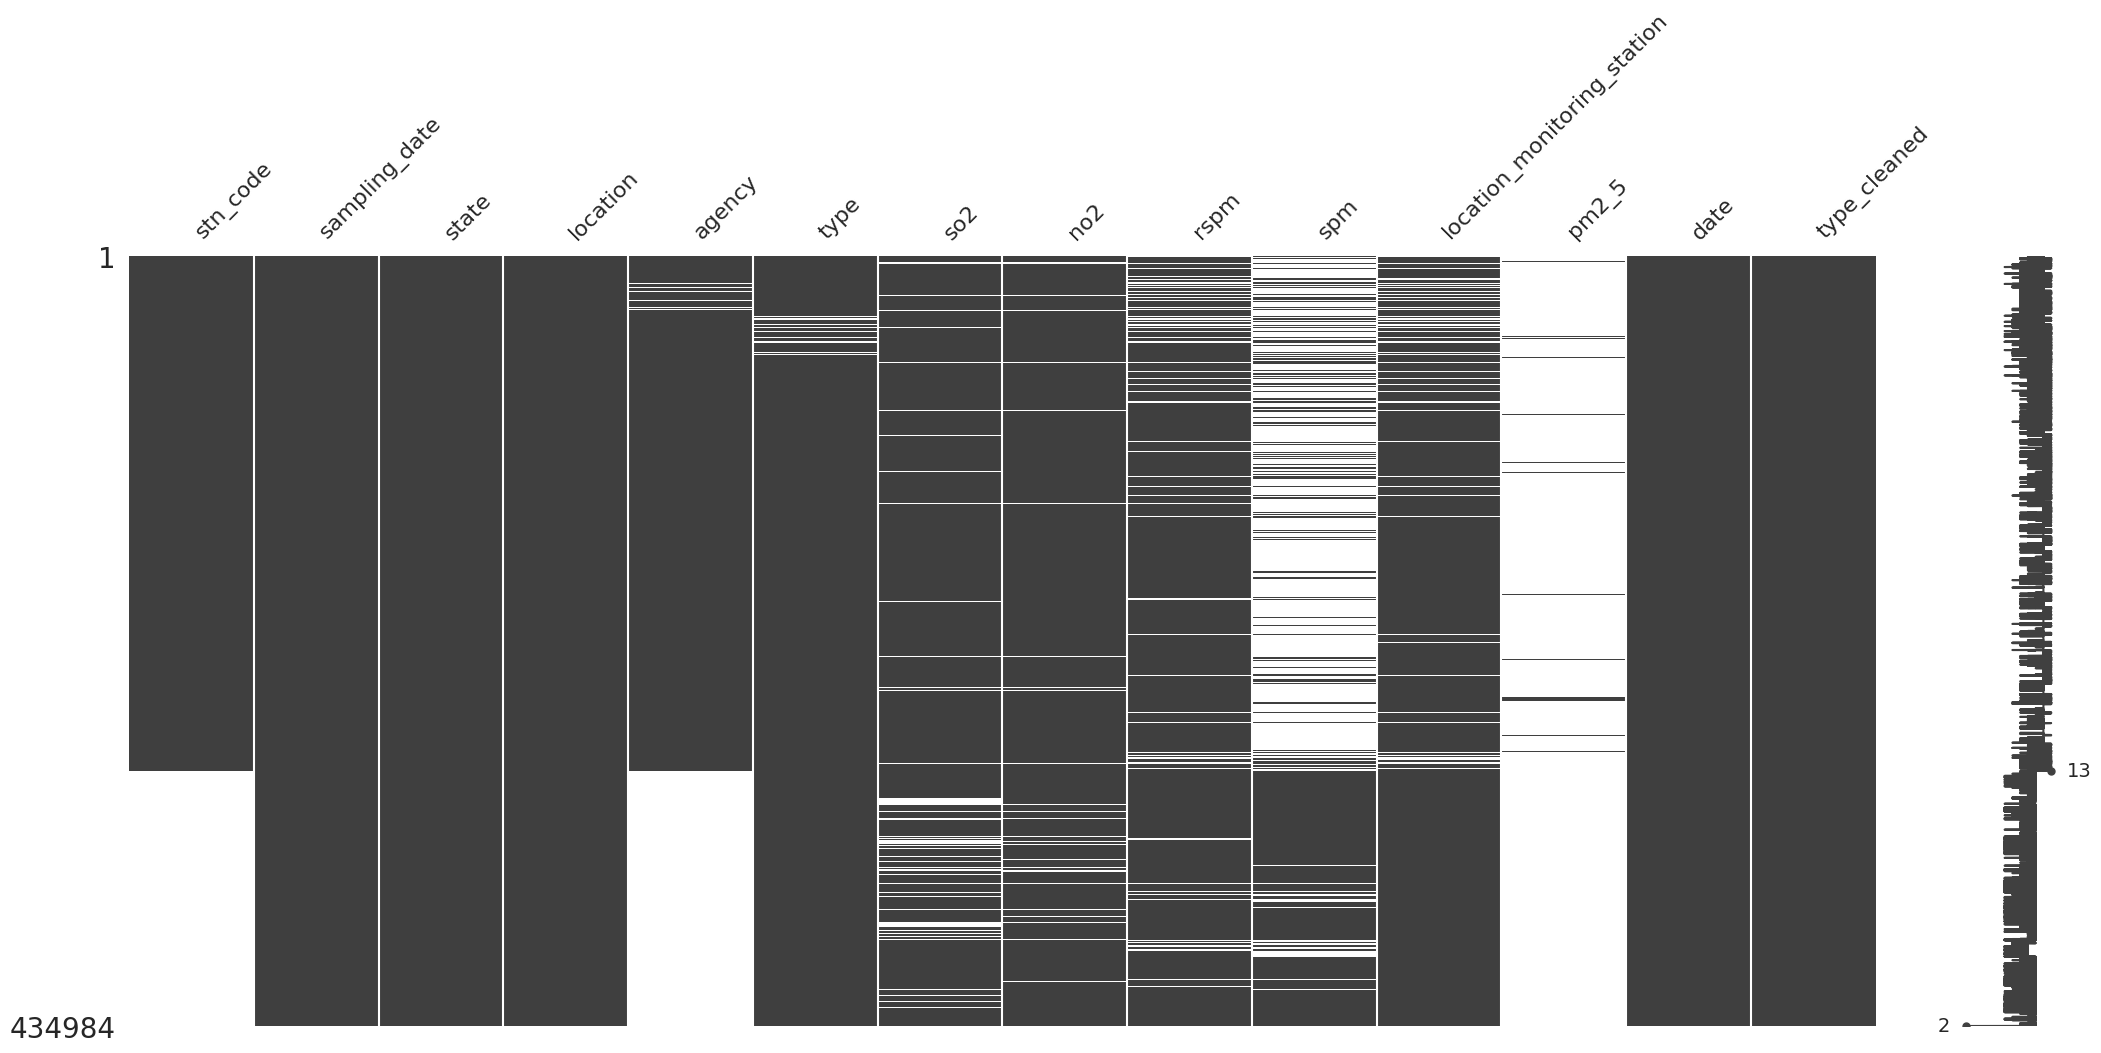

In [ ]:
msno.matrix(df)


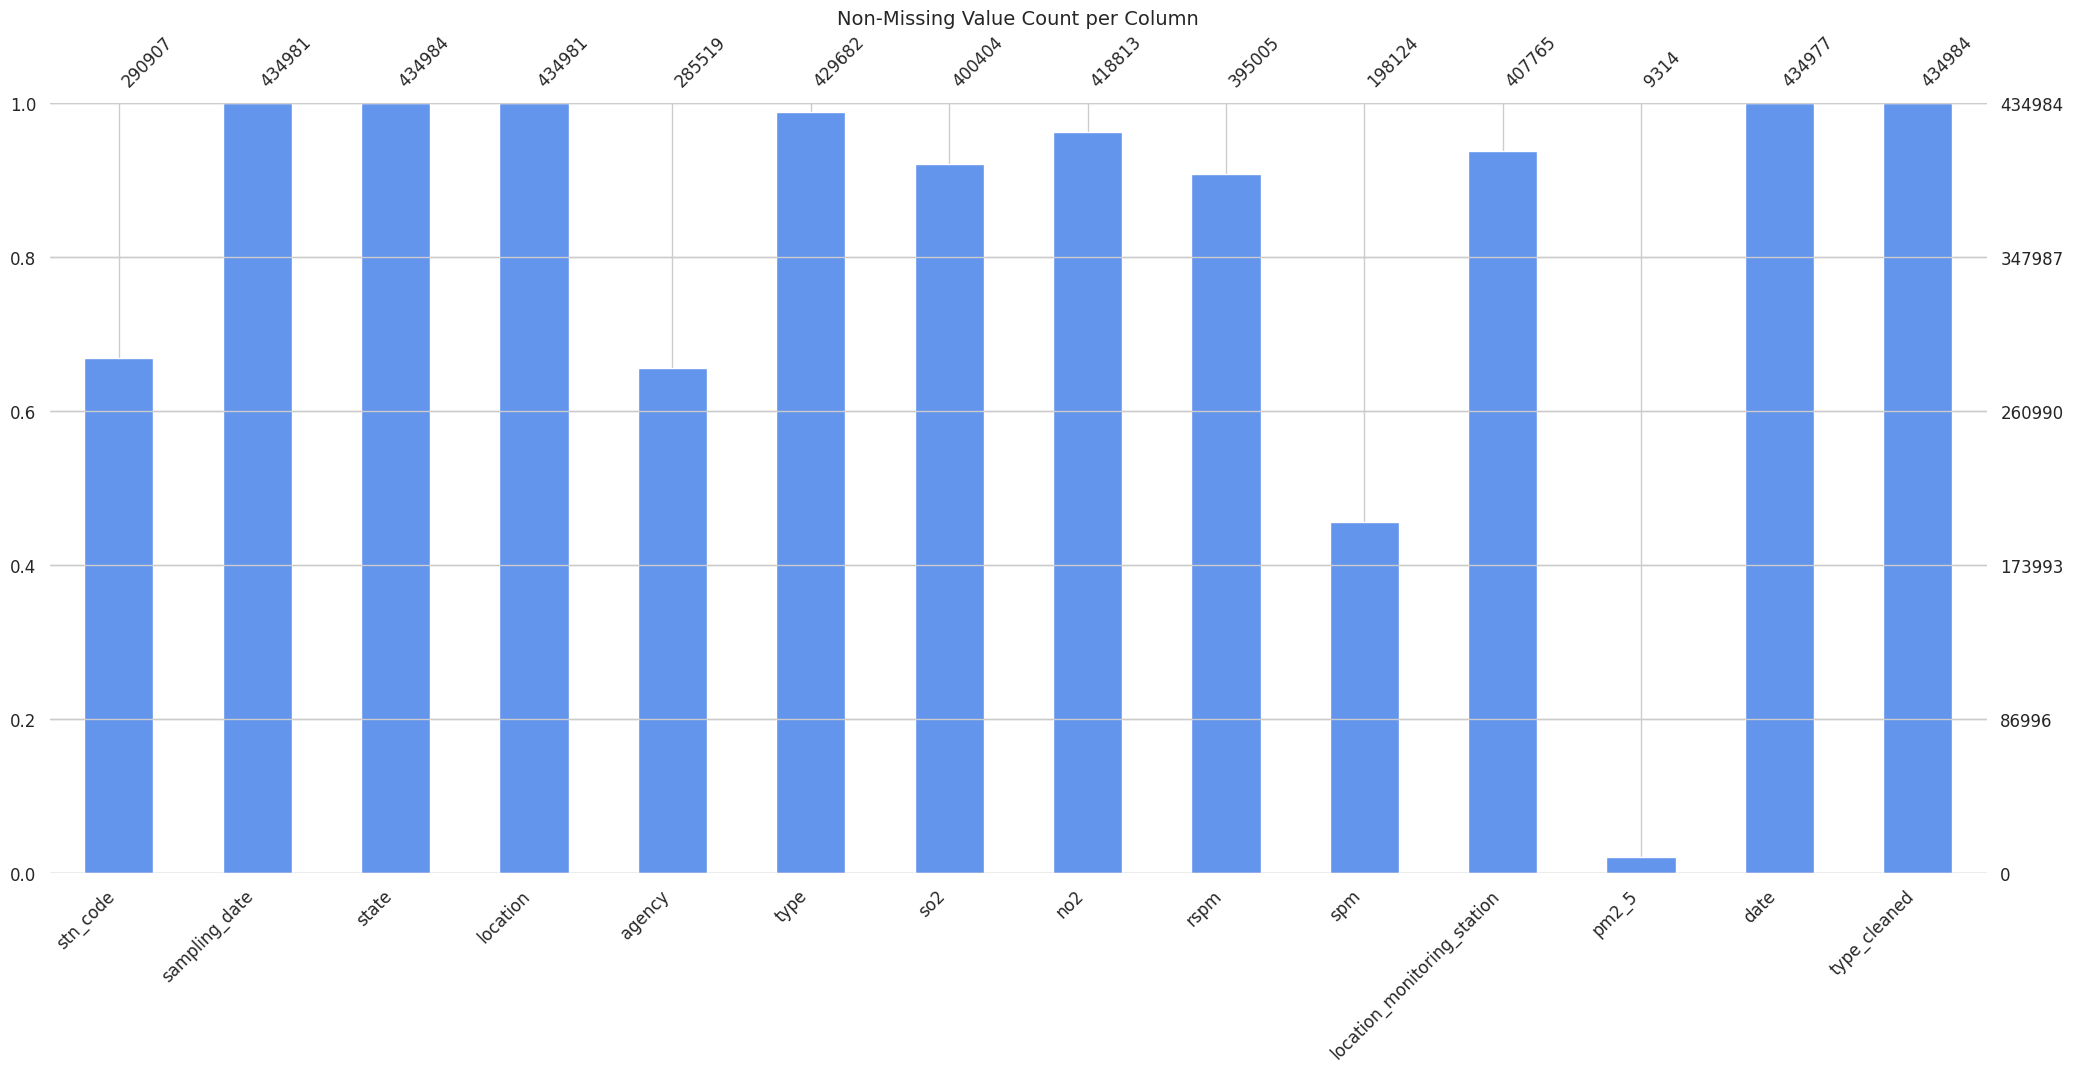

In [ ]:
# --- 2. Visualize with missingno bar plot ---
plt.figure(figsize=(10,5))
msno.bar(df, color='cornflowerblue', fontsize=12)
plt.title("Non-Missing Value Count per Column", fontsize=14)
plt.show()

In [ ]:
# --- 1. Compute absolute counts and percentages of missing values ---
missing_count = df.isnull().sum()
missing_percent = (missing_count / len(df)) * 100

missing_summary = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing (%)': missing_percent.round(4)
}).sort_values(by='Missing (%)', ascending=False)

print("📊 Missing Value Summary (count + percentage):")
display(missing_summary)

📊 Missing Value Summary (count + percentage):


,Missing Count,Missing (%)
pm2_5,425670,97.8588
spm,236860,54.4526
agency,149465,34.3610
stn_code,144077,33.1224
rspm,39979,9.1909
so2,34580,7.9497
location_monitoring_station,27219,6.2575
no2,16171,3.7176
type,5302,1.2189
date,7,0.0016


In [ ]:
print("\nMissing value count and ratio (%)")

missing_count = df.isnull().sum()
missing_ratio = (missing_count / len(df) * 100).round(4)

missing_df = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Ratio (%)': missing_ratio
}).reset_index()

missing_df.rename(columns={'index': 'Column'}, inplace=True)
missing_df.sort_values(by='Missing Ratio (%)', ascending=False, inplace=True)
missing_df



Missing value count and ratio (%)


,Column,Missing Count,Missing Ratio (%)
11,pm2_5,425670,97.8588
9,spm,236860,54.4526
4,agency,149465,34.3610
0,stn_code,144077,33.1224
8,rspm,39979,9.1909
6,so2,34580,7.9497
10,location_monitoring_station,27219,6.2575
7,no2,16171,3.7176
5,type,5302,1.2189
12,date,7,0.0016


In [ ]:
df[df['date'].isna()][df.columns]


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date,type_cleaned
245191,281,31/6/2014,Maharashtra,Chandrapur,Maharashtra State Pollution Control Board,Industrial Area,11.0,25.0,80.0,NaN,M.I.D.C. Chandrapur.,NaN,NaT,Industrial
148537,598,31/9/2014,Karnataka,Bangalore,Karnataka State Pollution Control Board,Sensitive Area,6.0,8.0,25.0,NaN,"Department of Environmental Science, Jnanabharathi Campus, Bangalore University",NaN,NaT,Sensitive
245355,639,31/6/2014,Maharashtra,Chandrapur,Maharashtra State Pollution Control Board,"Residential, Rural and other Areas",12.0,41.0,104.0,NaN,"Muncipal Council, Ballarshah, Chandrapur",NaN,NaT,Residential
284318,690,31/11/2014,Odisha,Balasore,Odisha State Pollution Control Board,Industrial Area,9.0,14.0,105.0,NaN,"Rasulpur, Near Balgopalpur Industrial Area",NaN,NaT,Industrial
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,Unknown
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,Unknown
435741,NaN,NaN,Tripura,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,Unknown


In [ ]:
# List of columns to inspect
cols_to_check = ['date', 'sampling_date', 'location']

# For each column, print rows where the value is missing
for col in cols_to_check:
    missing_rows = df[df[col].isna()]
    print(f"\n📌 Missing rows for column: '{col}' ({len(missing_rows)} rows)")
    display(missing_rows[['stn_code', 'state', 'location', 'sampling_date', 'date']].head(10))



📌 Missing rows for column: 'date' (7 rows)


,stn_code,state,location,sampling_date,date
245191,281,Maharashtra,Chandrapur,31/6/2014,NaT
148537,598,Karnataka,Bangalore,31/9/2014,NaT
245355,639,Maharashtra,Chandrapur,31/6/2014,NaT
284318,690,Odisha,Balasore,31/11/2014,NaT
435739,NaN,andaman-and-nicobar-islands,NaN,NaN,NaT
435740,NaN,Lakshadweep,NaN,NaN,NaT
435741,NaN,Tripura,NaN,NaN,NaT



📌 Missing rows for column: 'sampling_date' (3 rows)


,stn_code,state,location,sampling_date,date
435739,NaN,andaman-and-nicobar-islands,NaN,NaN,NaT
435740,NaN,Lakshadweep,NaN,NaN,NaT
435741,NaN,Tripura,NaN,NaN,NaT



📌 Missing rows for column: 'location' (3 rows)


,stn_code,state,location,sampling_date,date
435739,NaN,andaman-and-nicobar-islands,NaN,NaN,NaT
435740,NaN,Lakshadweep,NaN,NaN,NaT
435741,NaN,Tripura,NaN,NaN,NaT


In [ ]:
# need to drop the above three rows

In [ ]:
# Step 2. Detect missing (NaN or NaT) for each column
missing_mask = {col: df[col].isna() for col in cols_to_check}

# Step 3. Combine boolean masks to find intersections
overlap_1 = missing_mask['date'] & missing_mask['sampling_date']
overlap_2 = missing_mask['date'] & missing_mask['location']
overlap_3 = missing_mask['sampling_date'] & missing_mask['location']
overlap_all = missing_mask['date'] & missing_mask['sampling_date'] & missing_mask['location']

# Step 4. Count how many rows overlap
print("📊 Overlap counts:")
print(f"date ∩ sampling_date          : {overlap_1.sum()}")
print(f"date ∩ location               : {overlap_2.sum()}")
print(f"sampling_date ∩ location      : {overlap_3.sum()}")
print(f"date ∩ sampling_date ∩ location : {overlap_all.sum()}")

# Step 5. (Optional) Display the overlapping rows
if overlap_all.sum() > 0:
    display(df.loc[overlap_all])


📊 Overlap counts:
date ∩ sampling_date          : 3
date ∩ location               : 3
sampling_date ∩ location      : 3
date ∩ sampling_date ∩ location : 3


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date,type_cleaned
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,Unknown
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,Unknown
435741,NaN,NaN,Tripura,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,Unknown


# 6. Relations between Features

<Figure size 600x400 with 0 Axes>

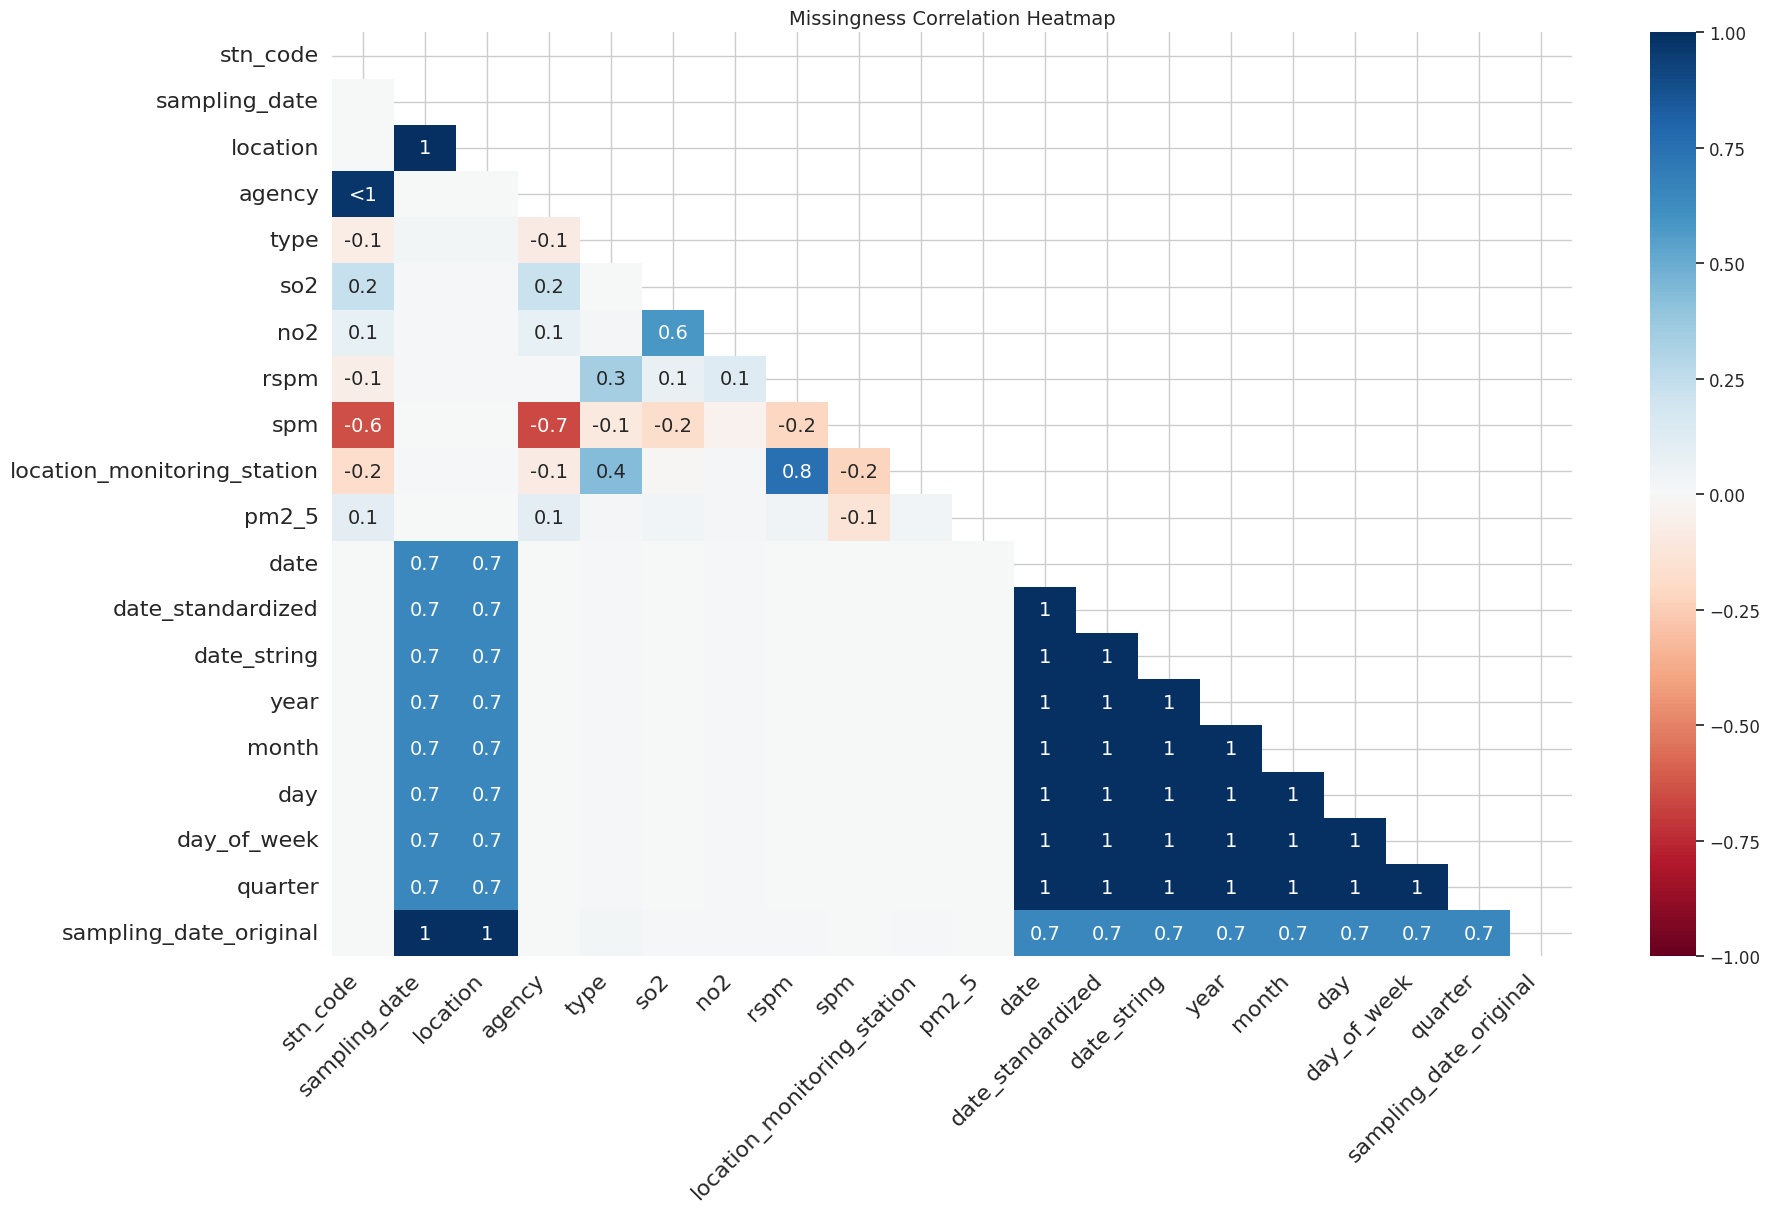

In [ ]:
# Shows pairwise nullity correlation between columns (e.g., when one column is missing, is another likely missing too?)
plt.figure(figsize=(6,4))
msno.heatmap(df)
plt.title("Missingness Correlation Heatmap", fontsize=14)
plt.show()

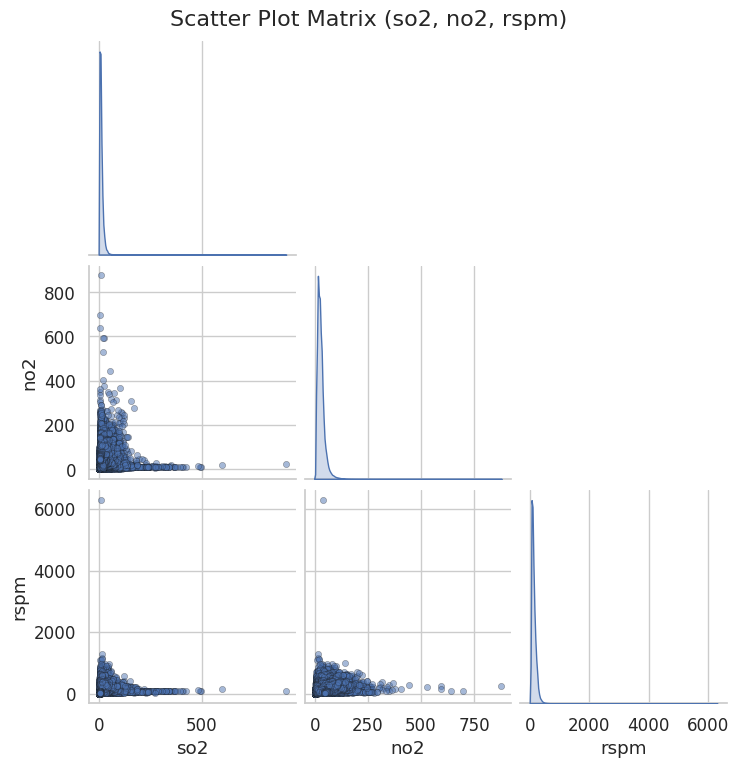

In [ ]:
# Scatter Plot Matrix for Variables with Relatively Low Missingness

subset_cols = ['so2', 'no2', 'rspm']
df_subset = df[subset_cols].dropna()

sns.pairplot(df_subset, diag_kind="kde", corner=True,
             plot_kws={'alpha':0.5, 's':20, 'edgecolor':'k'})

plt.suptitle("Scatter Plot Matrix (so2, no2, rspm)", y=1.02, fontsize=16)
plt.show()


In [ ]:
# Count number of unique stations per city

# Group by 'state' and 'location' and count unique 'stn_code'
station_counts = (
    df.groupby(['state', 'location'])['stn_code']
      .nunique()
      .reset_index()
      .rename(columns={'stn_code': 'num_stations'})
      .sort_values('num_stations', ascending=False)
)

print("🏙️ Number of monitoring stations per city:")
display(station_counts.head(20))  # show top 20


🏙️ Number of monitoring stations per city:


,state,location,num_stations
283,Uttar Pradesh,Kanpur,16
192,Maharashtra,Pune,15
188,Maharashtra,Nagpur,13
255,Tamil Nadu,Madras,11
79,Gujarat,Ahmedabad,11
4,Andhra Pradesh,Hyderabad,11
252,Tamil Nadu,Chennai,11
59,Delhi,Delhi,11
31,Assam,Guwahati,11
272,Uttar Pradesh,Agra,10


🏙️ Number of monitoring stations per city:
         state      location  num_stations
 Uttar Pradesh        Kanpur            16
   Maharashtra          Pune            15
   Maharashtra        Nagpur            13
    Tamil Nadu        Madras            11
       Gujarat     Ahmedabad            11
Andhra Pradesh     Hyderabad            11
    Tamil Nadu       Chennai            11
         Delhi         Delhi            11
         Assam      Guwahati            11
 Uttar Pradesh          Agra            10
     Telangana     Hyderabad            10
     Karnataka     Bangalore            10
   West Bengal       Kolkata            10
 Uttar Pradesh       Lucknow            10
     Rajasthan        Jaipur             9
        Kerala        Cochin             9
        Kerala         Kochi             8
Andhra Pradesh Visakhapatnam             8
    Tamil Nadu     Tuticorin             8
    Tamil Nadu    Coimbatore             8


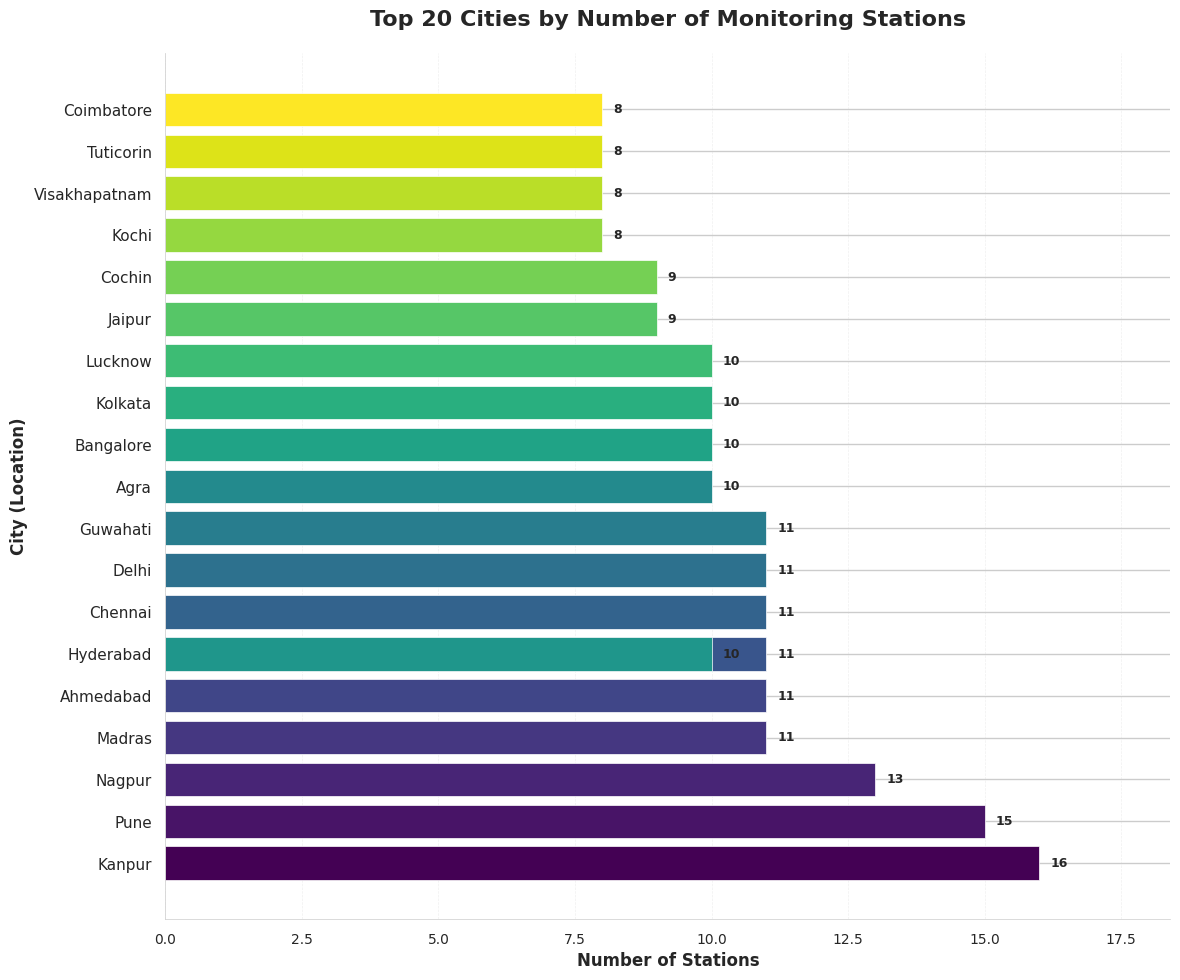


📊 Alternative Visualization (Seaborn)


/tmp/ipython-input-765066913.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


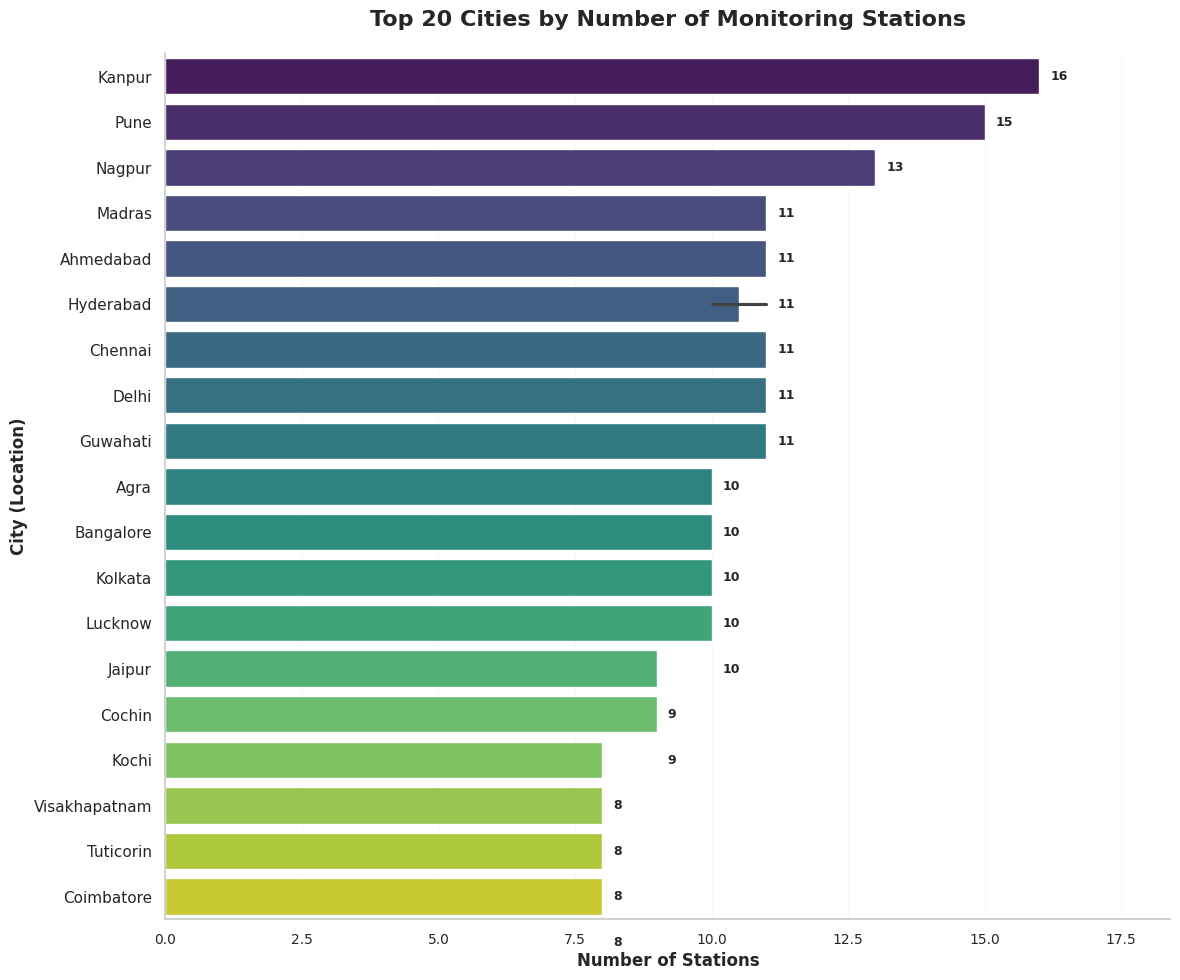

In [ ]:
# Group by 'state' and 'location' and count unique 'stn_code'
station_counts = (
    df.groupby(['state', 'location'])['stn_code']
      .nunique()
      .reset_index()
      .rename(columns={'stn_code': 'num_stations'})
      .sort_values('num_stations', ascending=False)
)

print("🏙️ Number of monitoring stations per city:")
print(station_counts.head(20).to_string(index=False))

# ==============================================================
# 📊 Visualization - FIXED VERSION (No Overlapping)
# ==============================================================

top_n = 20
subset = station_counts.head(top_n).reset_index(drop=True)

# Calculate optimal height: 0.5 inches per bar
height = max(8, 0.5 * len(subset))

fig, ax = plt.subplots(figsize=(12, height))

# Use matplotlib barh for better control (no overlapping)
colors = plt.cm.viridis(np.linspace(0, 1, len(subset)))

bars = ax.barh(
    y=subset['location'],
    width=subset['num_stations'],
    color=colors,
    edgecolor='white',
    linewidth=0.5,
    height=0.8  # Bar height (0.8 = 80% of space, leaving 20% gap)
)

# Add value labels on bars
for i, (bar, value) in enumerate(zip(bars, subset['num_stations'])):
    width = bar.get_width()
    ax.text(
        width + 0.2,  # Slightly right of bar end
        bar.get_y() + bar.get_height() / 2,
        f'{int(value)}',
        ha='left',
        va='center',
        fontsize=9,
        weight='bold'
    )

# Formatting
ax.set_title(f'Top {top_n} Cities by Number of Monitoring Stations',
             fontsize=16, weight='bold', pad=20)
ax.set_xlabel('Number of Stations', fontsize=12, weight='bold')
ax.set_ylabel('City (Location)', fontsize=12, weight='bold')

# Grid for better readability
ax.grid(axis='x', alpha=0.3, linestyle='--', linewidth=0.5)
ax.set_axisbelow(True)

# Adjust x-axis to accommodate labels
max_stations = subset['num_stations'].max()
ax.set_xlim(0, max_stations * 1.15)

# Styling
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)

plt.yticks(fontsize=11)
plt.xticks(fontsize=10)
plt.tight_layout()
plt.show()

# ==============================================================
# 📊 Alternative: Seaborn Version (Properly Configured)
# ==============================================================

print("\n" + "="*80)
print("📊 Alternative Visualization (Seaborn)")
print("="*80)

fig, ax = plt.subplots(figsize=(12, height))

# Use seaborn WITHOUT hue to avoid overlapping
sns.barplot(
    data=subset,
    x='num_stations',
    y='location',
    palette='viridis',
    ax=ax,
    orient='h'
)

# Add value labels
for i, (idx, row) in enumerate(subset.iterrows()):
    ax.text(
        row['num_stations'] + 0.2,
        i,
        f"{int(row['num_stations'])}",
        va='center',
        ha='left',
        fontsize=9,
        weight='bold'
    )

ax.set_title(f'Top {top_n} Cities by Number of Monitoring Stations',
             fontsize=16, weight='bold', pad=20)
ax.set_xlabel('Number of Stations', fontsize=12, weight='bold')
ax.set_ylabel('City (Location)', fontsize=12, weight='bold')

# Grid
ax.grid(axis='x', alpha=0.3, linestyle='--', linewidth=0.5)
ax.set_axisbelow(True)

# Adjust limits
max_stations = subset['num_stations'].max()
ax.set_xlim(0, max_stations * 1.15)

# Styling
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.yticks(fontsize=11)
plt.xticks(fontsize=10)
plt.tight_layout()
plt.show()
